In [1]:
#Carga de librerias y de dataset
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("Video_Game_Sales_as_of_Jan_2017.csv")

In [2]:
#Limpieza de dataset

#Renombrar columnas
df.columns = ["Nombre", "Plataforma", "Año_de_Salida", "Genero", "Editor", "Ventas_NA", "Ventas_EUR", "Ventas_JP", "Otros_Ventas", "Ventas_Globales", "Puntuacion_Criticos", "Numero_de_Criticas_Profesionales", "Puntuacion_Usuarios", "Numero_de_Criticas_de_Usuarios", "Rating"]
# Remove NaN data from Year of Release Quitar Nan de "Año de salida"
df = df[df.Año_de_Salida.notnull()]

#Omitir videojuegos salidos antes del 2000 y en el año 2017
df = df.loc[df.Año_de_Salida < 2017]
df = df.loc[df.Año_de_Salida > 1999]
#Pasar "Año_de_Salida a Int"
df.Año_de_Salida = df['Año_de_Salida'].astype(int)

In [3]:
#Pasar Puntuacion_Usuarios a escala del 1 al 100
df["Puntuacion_Usuarios"] = df["Puntuacion_Usuarios"]*10

In [4]:
#En la base de datos hay juegos como pokemon Blue con datos de ventas globales pero sin informacion de Criticas de pros ni de users. Se eliminan por que no estan
#en metacritic sino añadidos manualmente para aportar informacion de ventas
df = df[df.Puntuacion_Criticos.notnull()]
df = df[df.Puntuacion_Usuarios.notnull()]

In [5]:
#Correlacion global critica profesional critica usuarios
corr_user_crit = df[["Puntuacion_Criticos", "Puntuacion_Usuarios"]]
#Correlacion global critica profesional critica usuarios y genero
corr_user_crit_genre = df[["Puntuacion_Criticos", "Puntuacion_Usuarios", 'Genero']]
#Correlacion global critica profesional critica usuarios y genero
corr_user_crit_platform = df[["Puntuacion_Criticos", "Puntuacion_Usuarios", 'Plataforma']]

C:\Users\Antonio Pol\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


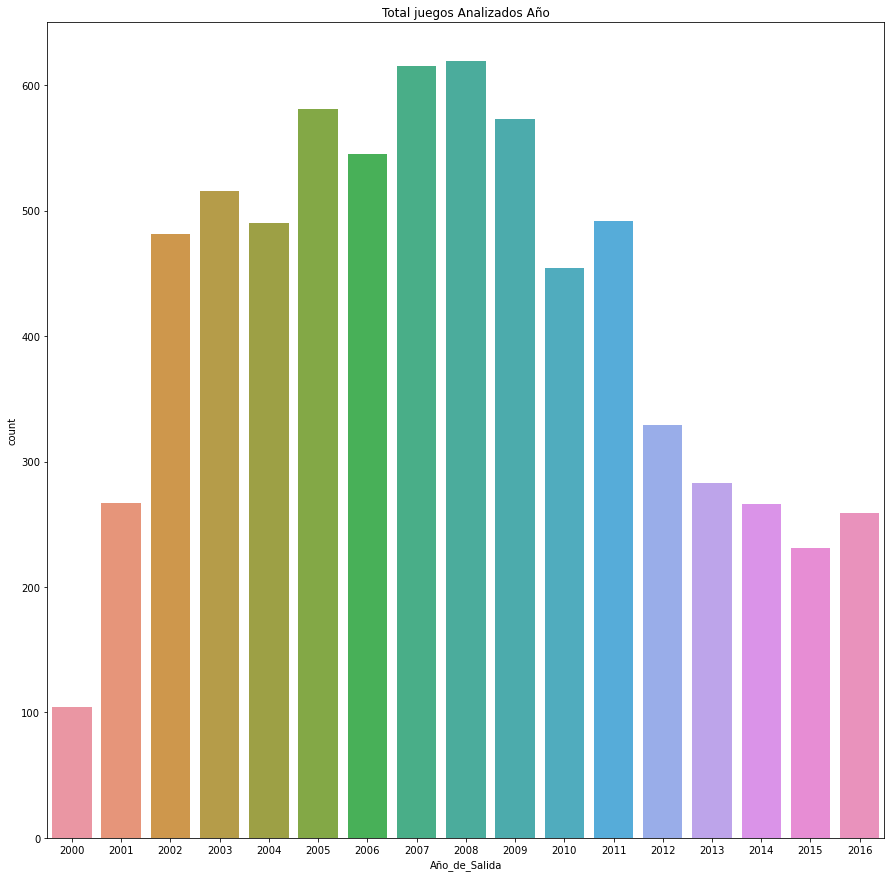

In [6]:
#Total juegos analizados por año de salida
plt.figure(figsize=(15,15))
plt.title("Total juegos Analizados Año")

sns.countplot(df["Año_de_Salida"]);

C:\Users\Antonio Pol\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


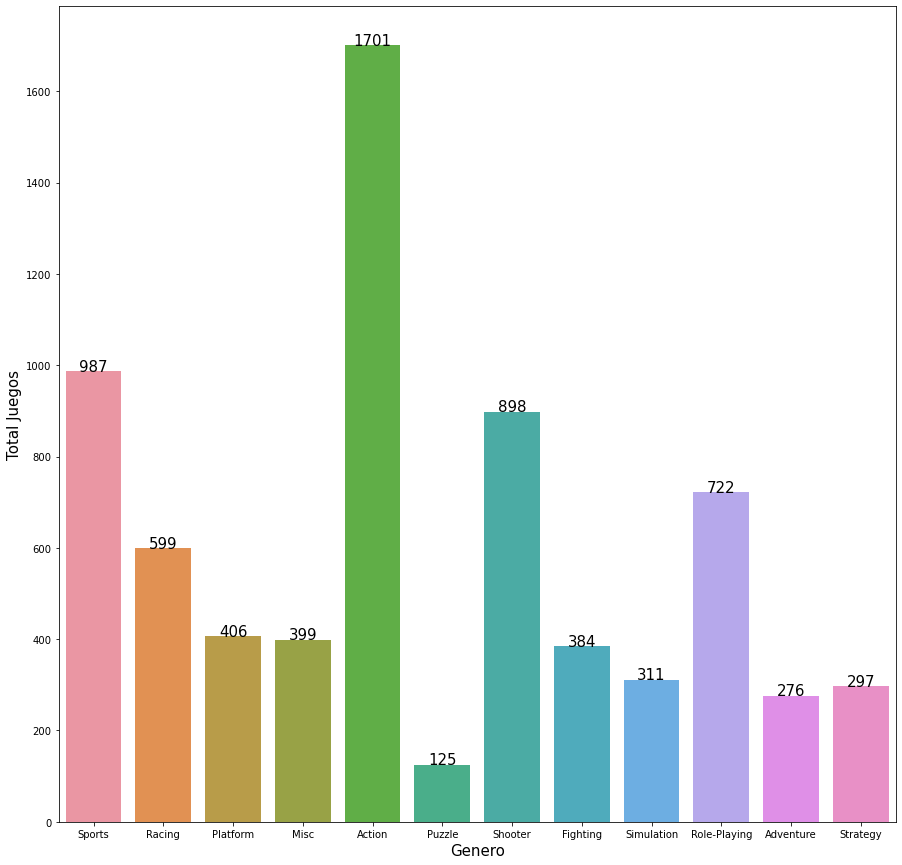

In [7]:
#Total juegos analizados por genero
plt.figure(figsize=(15,15))
ax = sns.countplot(df["Genero"]);
ax.set_xlabel('Genero', fontsize = 15)
ax.set_ylabel('Total Juegos', fontsize = 15)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 15)

Nombre Plataforma  Año_de_Salida  Puntuacion_Criticos  \
0             Wii Sports        Wii           2006                 76.0   
2         Mario Kart Wii        Wii           2008                 82.0   
3      Wii Sports Resort        Wii           2009                 80.0   
6  New Super Mario Bros.         DS           2006                 89.0   
7               Wii Play        Wii           2006                 58.0   

   Puntuacion_Usuarios  Ventas_Globales  
0                 80.0            82.54  
2                 83.0            35.57  
3                 80.0            32.78  
6                 85.0            29.81  
7                 66.0            28.92

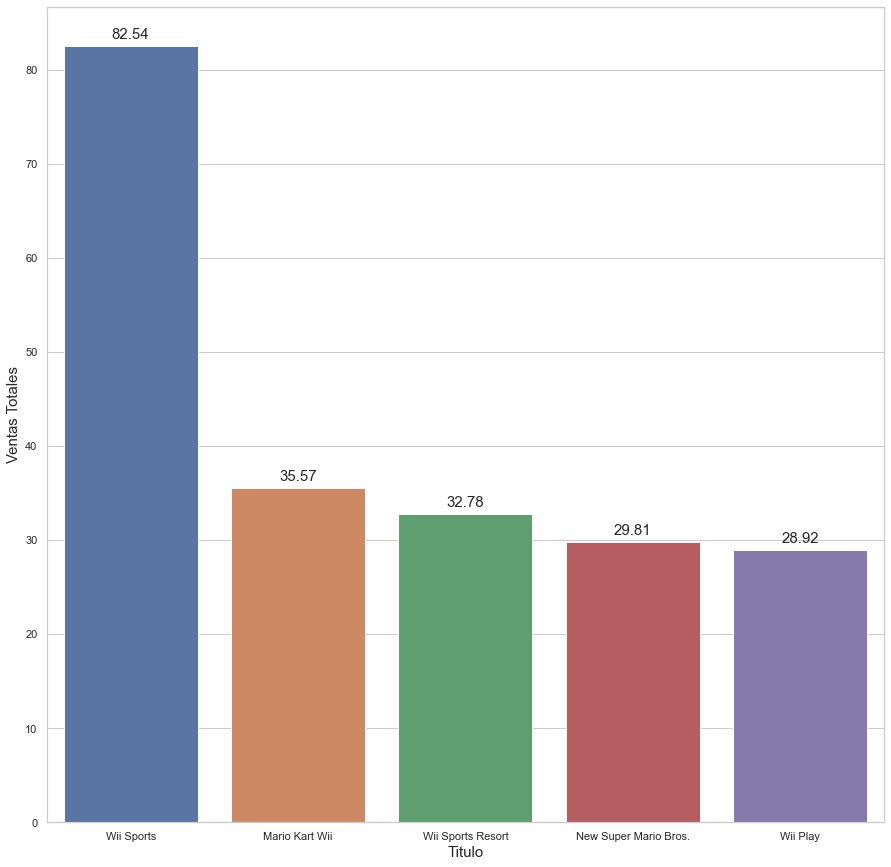

In [8]:
#Sacar Top 5 juegos mas vendidos 
mas_vendidos = df[['Nombre', 'Plataforma',"Año_de_Salida", "Puntuacion_Criticos", "Puntuacion_Usuarios", "Ventas_Globales"]]
mas_vendidos.sort_values(['Ventas_Globales'],ascending=False)
df_top5ventas = mas_vendidos.head(5)
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,15))
ax2 = sns.barplot(x="Nombre", y="Ventas_Globales", data=df_top5ventas)
ax2.set_xlabel('Titulo', fontsize = 15)
ax2.set_ylabel('Ventas Totales', fontsize = 15)
for rect in ax2.patches:
    ax2.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 15)

df_top5ventas

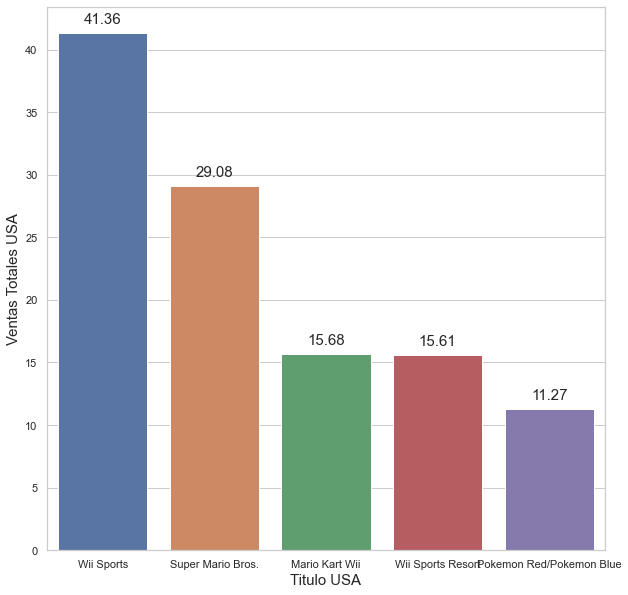

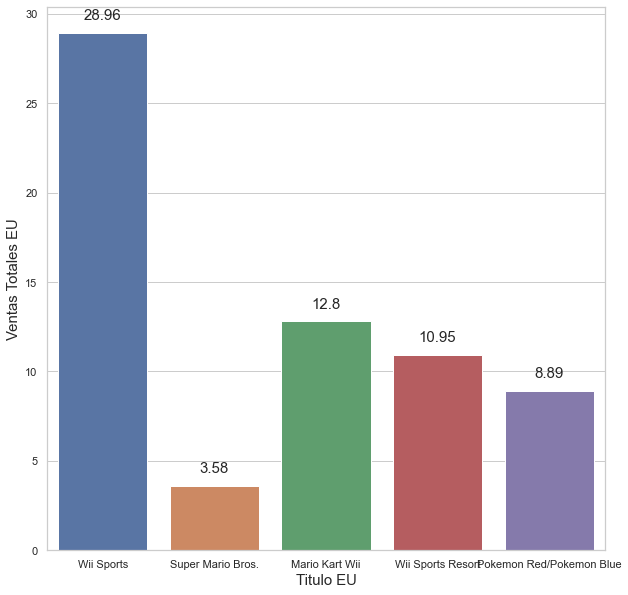

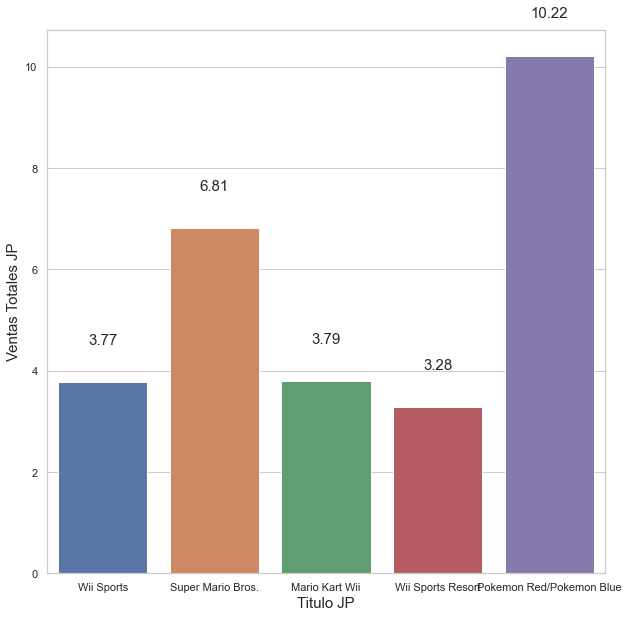

In [11]:
#Top 5 por regiones 
df2 = pd.read_csv("Video_Game_Sales_as_of_Jan_2017.csv")
df2.columns = ["Nombre", "Plataforma", "Año_de_Salida", "Genero", "Editor", "Ventas_NA", "Ventas_EUR", "Ventas_JP", "Otros_Ventas", "Ventas_Globales", "Puntuacion_Criticos", "Numero_de_Criticas_Profesionales", "Puntuacion_Usuarios", "Numero_de_Criticas_de_Usuarios", "Rating"]

mas_vendidos_usa = df2[['Nombre', 'Plataforma',"Año_de_Salida", "Puntuacion_Criticos", "Puntuacion_Usuarios", "Ventas_NA"]]
mas_vendidos_usa.sort_values(['Ventas_NA'],ascending=False)
df_mas_vendidos_usa = mas_vendidos_usa.head(5)

mas_vendidos_eu = df2[['Nombre', 'Plataforma',"Año_de_Salida", "Puntuacion_Criticos", "Puntuacion_Usuarios", "Ventas_EUR"]]
mas_vendidos_eu.sort_values(['Ventas_EUR'],ascending=False)
df_mas_vendidos_eu = mas_vendidos_eu.head(5)

mas_vendidos_jp = df2[['Nombre', 'Plataforma',"Año_de_Salida", "Puntuacion_Criticos", "Puntuacion_Usuarios", "Ventas_JP"]]
mas_vendidos_jp.sort_values(['Ventas_JP'],ascending=False)
df_mas_vendidos_jp = mas_vendidos_jp.head(5)



sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,10))
ax3 = sns.barplot(x="Nombre", y="Ventas_NA", data=df_mas_vendidos_usa)
ax3.set_xlabel('Titulo USA', fontsize = 15)
ax3.set_ylabel('Ventas Totales USA', fontsize = 15)
for rect in ax3.patches:
    ax3.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 15)            
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,10))
ax4 = sns.barplot(x="Nombre", y="Ventas_EUR", data=df_mas_vendidos_eu)
ax4.set_xlabel('Titulo EU', fontsize = 15)
ax4.set_ylabel('Ventas Totales EU', fontsize = 15)
for rect in ax4.patches:
    ax4.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 15)

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,10))
ax5 = sns.barplot(x="Nombre", y="Ventas_JP", data=df_mas_vendidos_jp)
ax5.set_xlabel('Titulo JP', fontsize = 15)
ax5.set_ylabel('Ventas Totales JP', fontsize = 15)
for rect in ax5.patches:
    ax5.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 15) 

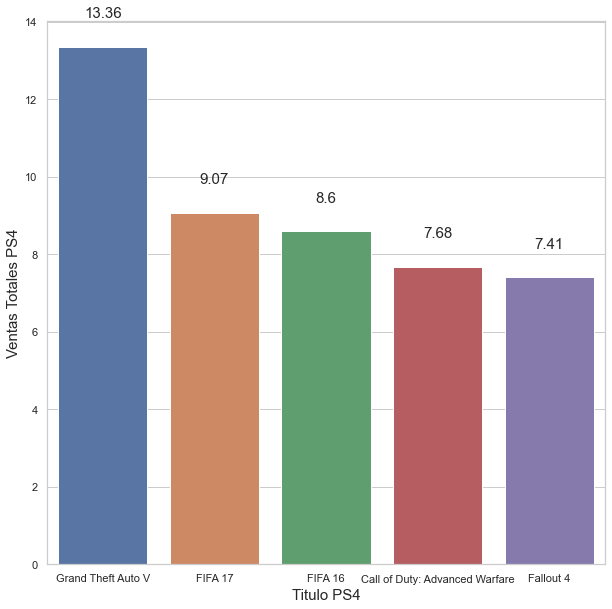

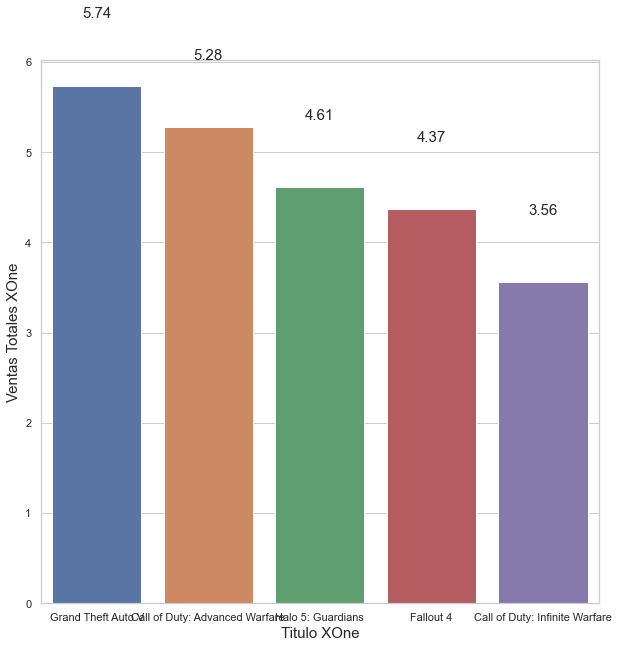

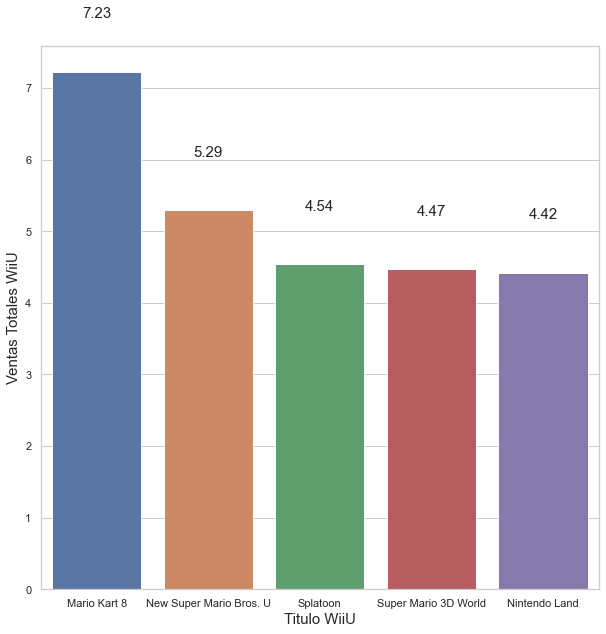

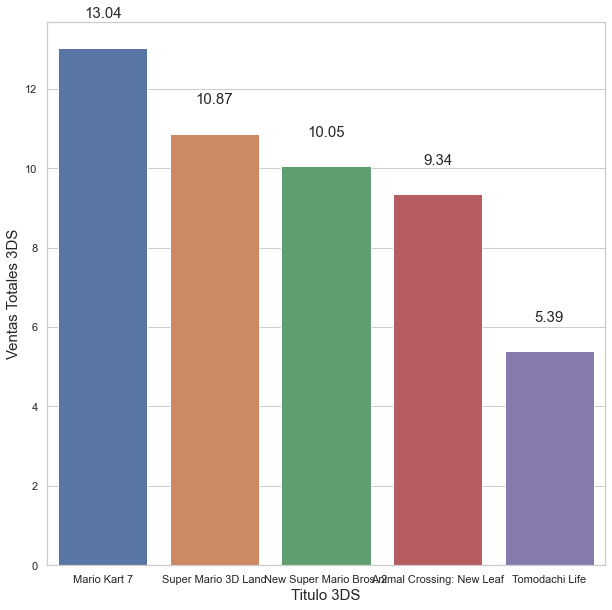

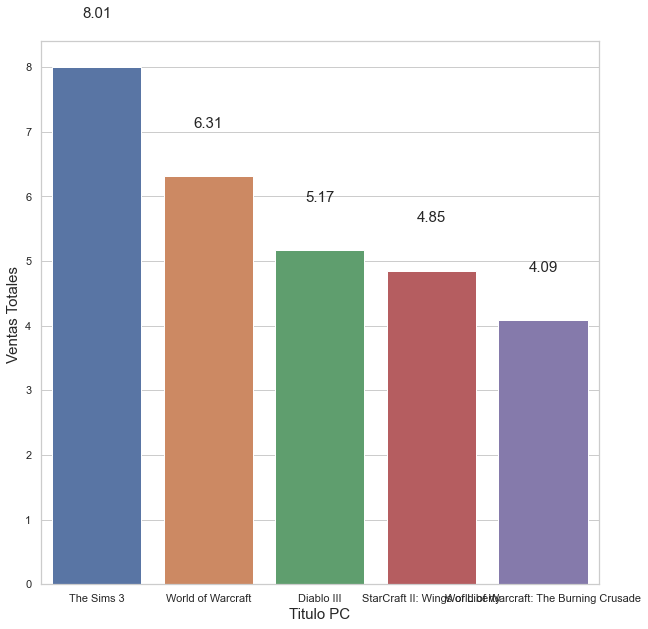

In [13]:
#Ventas Totales por plataformas actuales

filtro_ps4 = df[df.Plataforma == "PS4"]
mas_vendidos_ps4  = filtro_ps4[["Nombre", "Plataforma", "Año_de_Salida", "Puntuacion_Criticos", "Puntuacion_Usuarios", "Ventas_Globales"]]
mas_vendidos_ps4.sort_values(['Ventas_Globales'],ascending=False)
df_mas_vendidos_ps4 = mas_vendidos_ps4.head(5)

filtro_XOne = df[df.Plataforma == "XOne"]
mas_vendidos_XOne  = filtro_XOne[["Nombre", "Plataforma", "Año_de_Salida", "Puntuacion_Criticos", "Puntuacion_Usuarios", "Ventas_Globales"]]
mas_vendidos_XOne.sort_values(['Ventas_Globales'],ascending=False)
df_mas_vendidos_XOne = mas_vendidos_XOne.head(5)

filtro_wiiu = df[df.Plataforma == "WiiU"]
mas_vendidos_wiiu  = filtro_wiiu[["Nombre", "Plataforma", "Año_de_Salida", "Puntuacion_Criticos", "Puntuacion_Usuarios", "Ventas_Globales"]]
mas_vendidos_wiiu.sort_values(['Ventas_Globales'],ascending=False)
df_mas_vendidos_wiiu= mas_vendidos_wiiu.head(5)

filtro_3DS = df[df.Plataforma == "3DS"]
mas_vendidos_3DS  = filtro_3DS[["Nombre", "Plataforma", "Año_de_Salida", "Puntuacion_Criticos", "Puntuacion_Usuarios", "Ventas_Globales"]]
mas_vendidos_3DS.sort_values(['Ventas_Globales'],ascending=False)
df_mas_vendidos_3DS = mas_vendidos_3DS.head(5)

filtro_PC = df[df.Plataforma == "PC"]
mas_vendidos_PC  = filtro_PC[["Nombre", "Plataforma", "Año_de_Salida", "Puntuacion_Criticos", "Puntuacion_Usuarios", "Ventas_Globales"]]
mas_vendidos_PC.sort_values(['Ventas_Globales'],ascending=False)
df_mas_vendidos_PC = mas_vendidos_PC.head(5)

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,10))
ax_top5ps4= sns.barplot(x="Nombre", y='Ventas_Globales', data=df_mas_vendidos_ps4)
ax_top5ps4.set_xlabel('Titulo PS4', fontsize = 15)
ax_top5ps4.set_ylabel('Ventas Totales PS4', fontsize = 15)
for rect in ax_top5ps4.patches:
    ax_top5ps4.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 15) 

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,10))
ax_top5xone= sns.barplot(x="Nombre", y='Ventas_Globales', data=df_mas_vendidos_XOne)
ax_top5xone.set_xlabel('Titulo XOne', fontsize = 15)
ax_top5xone.set_ylabel('Ventas Totales XOne', fontsize = 15)
for rect in ax_top5xone.patches:
    ax_top5xone.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 15) 
    
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,10))
ax_top5WiiU= sns.barplot(x="Nombre", y='Ventas_Globales', data=df_mas_vendidos_wiiu)
ax_top5WiiU.set_xlabel('Titulo WiiU', fontsize = 15)
ax_top5WiiU.set_ylabel('Ventas Totales WiiU', fontsize = 15)
for rect in ax_top5WiiU.patches:
    ax_top5WiiU.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 15)
    
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,10))
ax_top53DS= sns.barplot(x="Nombre", y='Ventas_Globales', data=df_mas_vendidos_3DS)
ax_top53DS.set_xlabel('Titulo 3DS', fontsize = 15)
ax_top53DS.set_ylabel('Ventas Totales 3DS', fontsize = 15)
for rect in ax_top53DS.patches:
    ax_top53DS.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 15) 
    
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,10))
ax_top5PC= sns.barplot(x="Nombre", y='Ventas_Globales', data=df_mas_vendidos_PC)
ax_top5PC.set_xlabel('Titulo PC', fontsize = 15)
ax_top5PC.set_ylabel('Ventas Totales ', fontsize = 15)
for rect in ax_top5PC.patches:
    ax_top5PC.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 15) 

70.06305418719212


71.59591836734694

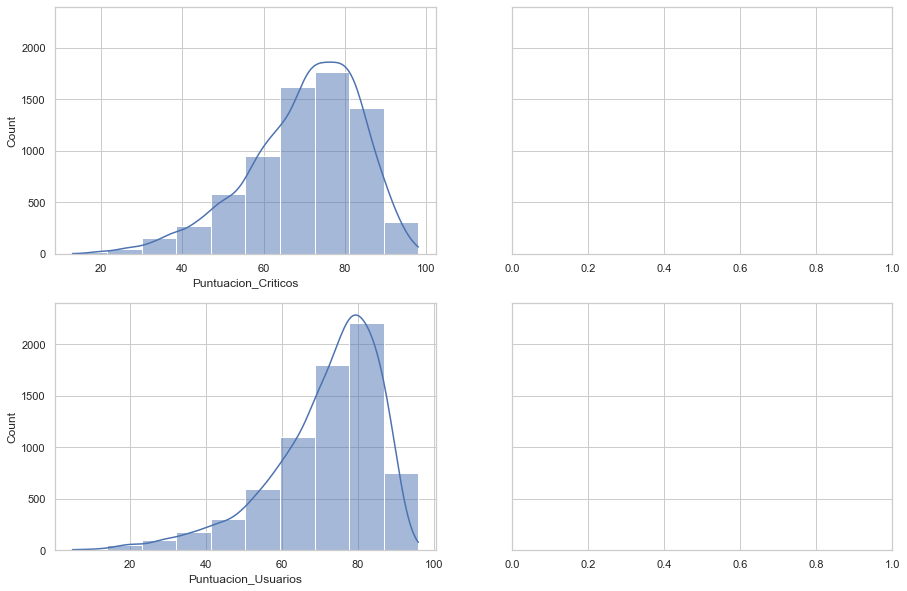

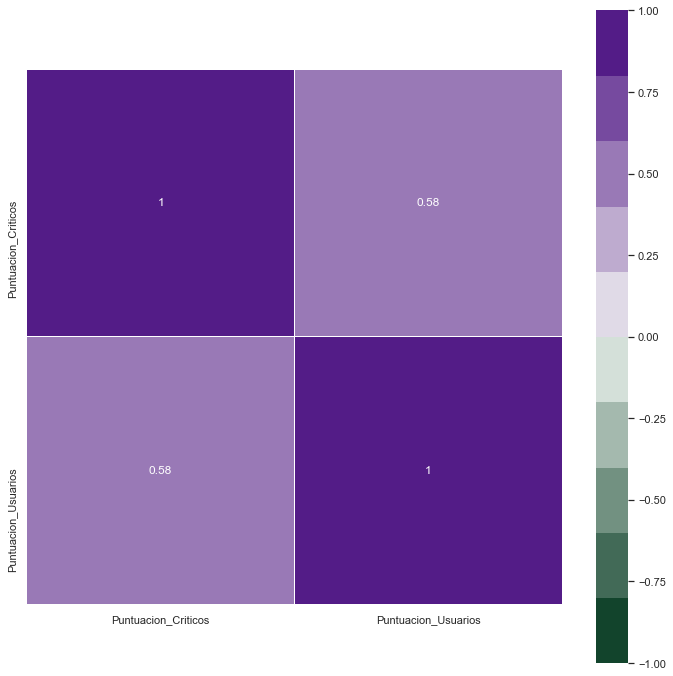

In [14]:
#COMPARACION DISTRIBUCION PUNTUACION DE LOS CRITICOS VS PUNTUACION USUARIOS

f, axes = plt.subplots(2, 2, figsize=(15,10), sharey=True)
sns.histplot(data=df, x='Puntuacion_Criticos', bins=10, kde=True, ax=axes[0, 0])
sns.histplot(data=df, x="Puntuacion_Usuarios", bins=10, kde=True, ax=axes[1, 0])
plt.figure(figsize=(12,12))
sns.heatmap(corr_user_crit.corr(), 
            vmin = -1, 
            vmax = 1, 
            cmap = sns.diverging_palette(145, 280, s=85, l=25, n=10), 
            annot = True,
           square = True,
           linewidths = .5);
print(df['Puntuacion_Criticos'].mean())
df["Puntuacion_Usuarios"].mean()

<AxesSubplot:xlabel='Puntuacion_Usuarios', ylabel='Count'>

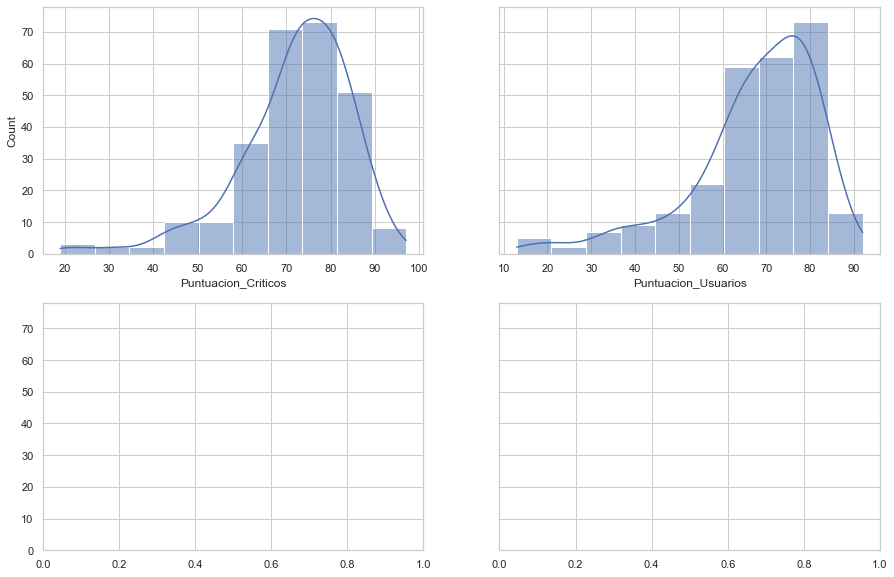

In [16]:
#Correlacion ps4 
f, axes = plt.subplots(2, 2, figsize=(15,10), sharey=True)
sns.histplot(data=filtro_ps4, x='Puntuacion_Criticos', bins=10, kde=True, ax=axes[0, 0])
sns.histplot(data=filtro_ps4, x="Puntuacion_Usuarios", bins=10, kde=True, ax=axes[0, 1])

<AxesSubplot:xlabel='Puntuacion_Usuarios', ylabel='Count'>

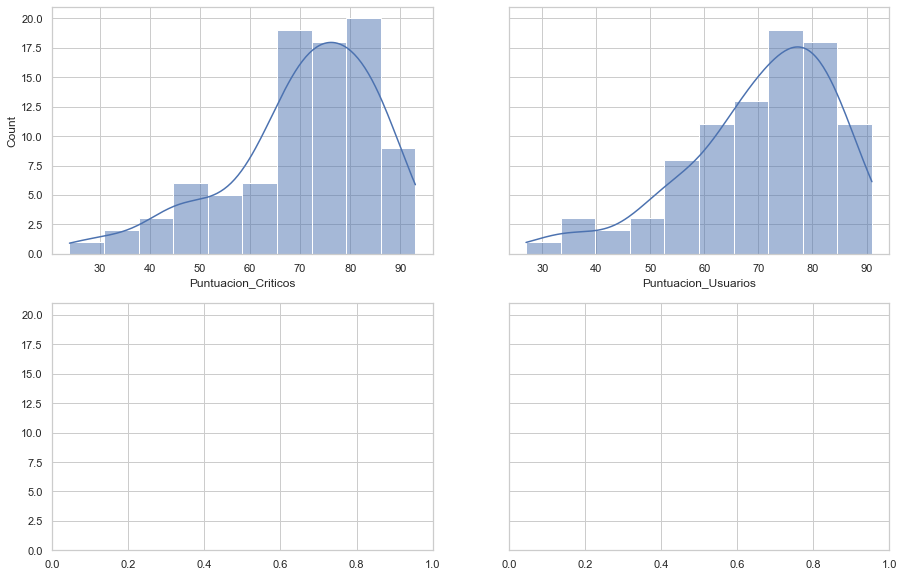

In [18]:
#Correlacion WiiU
f, axes = plt.subplots(2, 2, figsize=(15,10), sharey=True)
sns.histplot(data=filtro_wiiu, x='Puntuacion_Criticos', bins=10, kde=True, ax=axes[0, 0])
sns.histplot(data=filtro_wiiu, x="Puntuacion_Usuarios", bins=10, kde=True, ax=axes[0, 1])

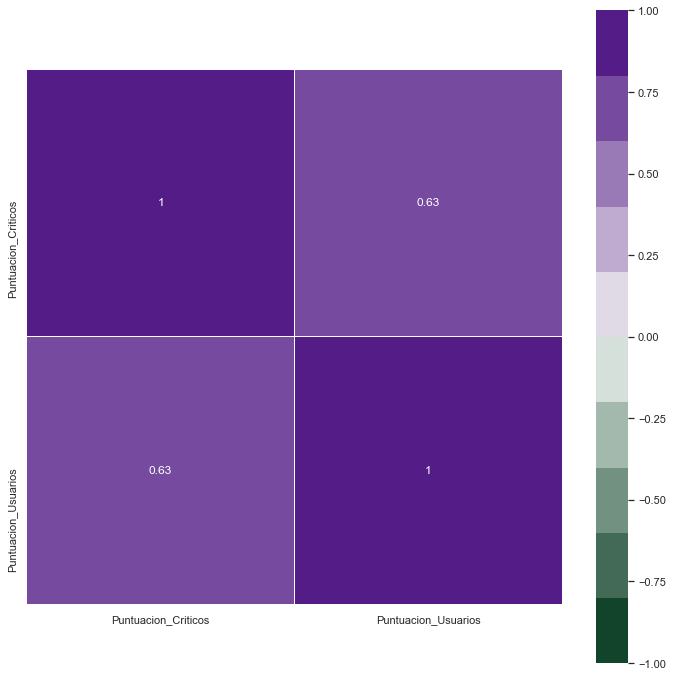

In [19]:
#Correlacion Genero Lucha
filtro_lucha = df[df.Genero == "Fighting"]
filtro_lucha_corr = filtro_lucha[["Puntuacion_Criticos", "Puntuacion_Usuarios"]]
plt.figure(figsize=(12,12))
sns.heatmap(filtro_lucha_corr.corr(), 
            vmin = -1, 
            vmax = 1, 
            cmap = sns.diverging_palette(145, 280, s=85, l=25, n=10), 
            annot = True,
           square = True,
           linewidths = .5);

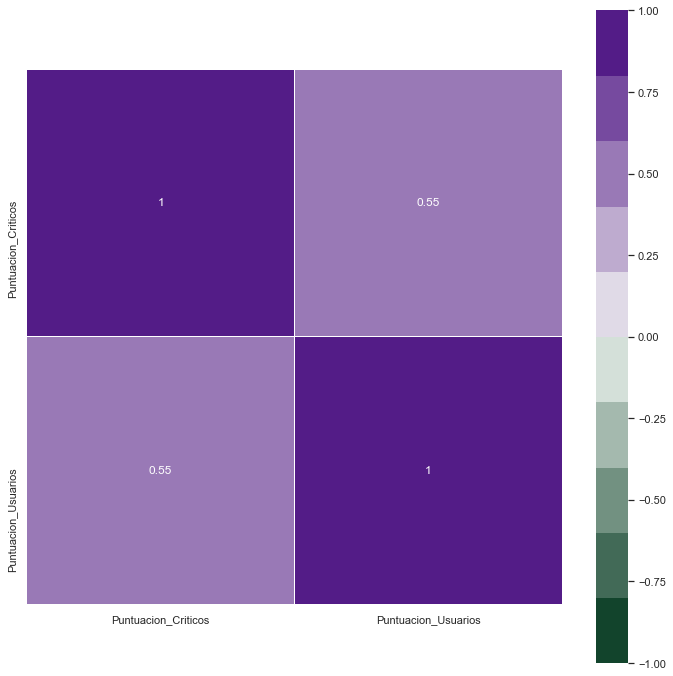

In [20]:
#Correlacion Racing
filtro_racing = df[df.Genero== "Racing"]
filtro_racing_corr = filtro_racing[["Puntuacion_Criticos", "Puntuacion_Usuarios"]]
plt.figure(figsize=(12,12))
sns.heatmap(filtro_racing_corr.corr(), 
            vmin = -1, 
            vmax = 1, 
            cmap = sns.diverging_palette(145, 280, s=85, l=25, n=10), 
            annot = True,
           square = True,
           linewidths = .5);

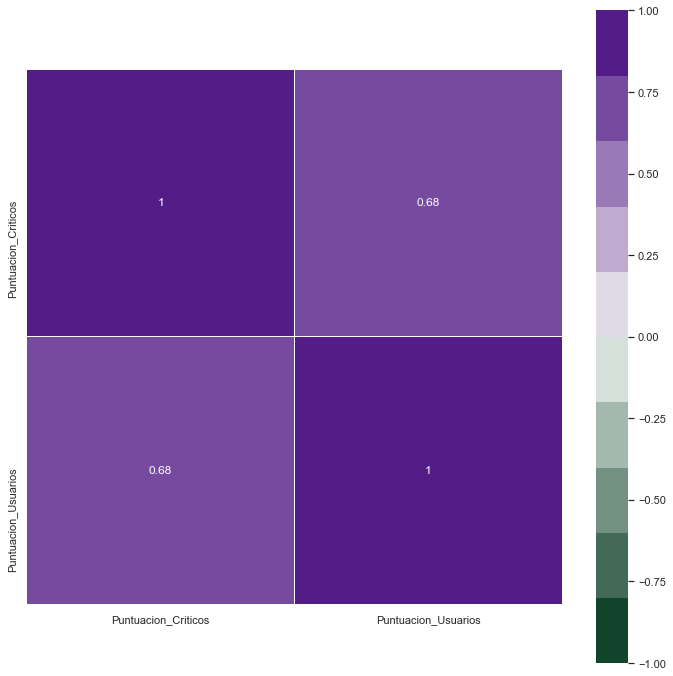

In [21]:
#Correlacion Platforma
filtro_Platform = df[df.Genero == "Platform"]
filtro_Platform_corr = filtro_Platform[["Puntuacion_Criticos", "Puntuacion_Usuarios"]]
plt.figure(figsize=(12,12))
sns.heatmap(filtro_Platform_corr.corr(), 
            vmin = -1, 
            vmax = 1, 
            cmap = sns.diverging_palette(145, 280, s=85, l=25, n=10), 
            annot = True,
           square = True,
           linewidths = .5);

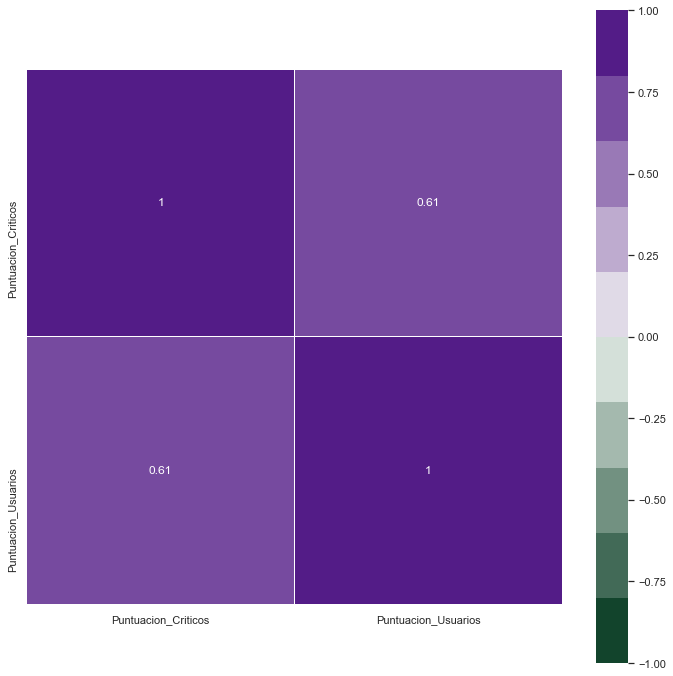

In [22]:
#Correlacion Misc
filtro_Misc = df[df.Genero == "Misc"]
filtro_Misc_corr = filtro_Misc[["Puntuacion_Criticos", "Puntuacion_Usuarios"]]
plt.figure(figsize=(12,12))
sns.heatmap(filtro_Misc_corr.corr(), 
            vmin = -1, 
            vmax = 1, 
            cmap = sns.diverging_palette(145, 280, s=85, l=25, n=10), 
            annot = True,
           square = True,
           linewidths = .5);

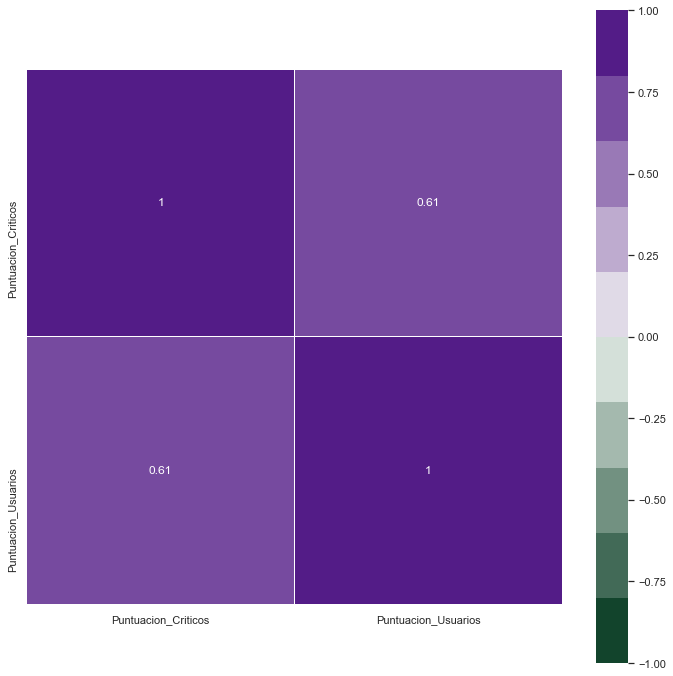

In [23]:
#Correlacion Action
filtro_Action = df[df.Genero == "Action"]
filtro_Action_corr = filtro_Action[["Puntuacion_Criticos", "Puntuacion_Usuarios"]] 
plt.figure(figsize=(12,12))
sns.heatmap(filtro_Action_corr.corr(), 
            vmin = -1, 
            vmax = 1, 
            cmap = sns.diverging_palette(145, 280, s=85, l=25, n=10), 
            annot = True,
           square = True,
           linewidths = .5);

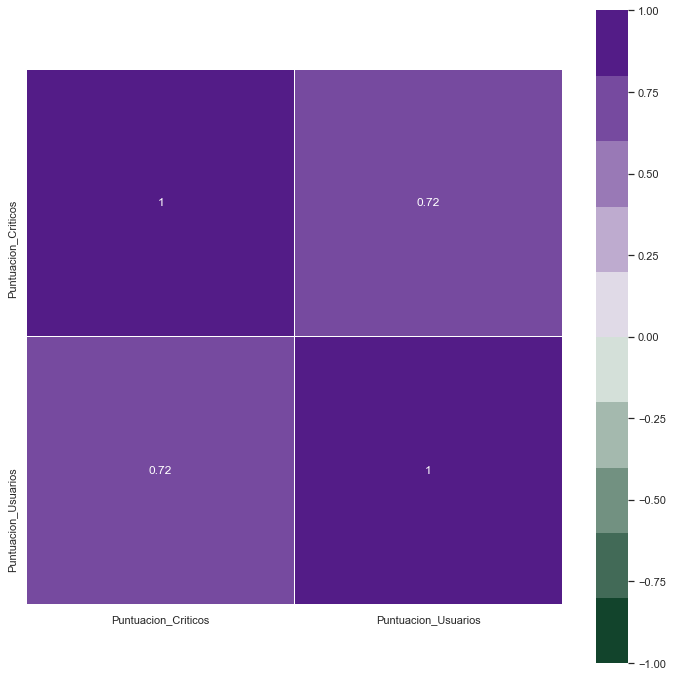

In [24]:
#Correlacion Puzzle
filtro_puzzle = df[df.Genero == "Puzzle"]
filtro_puzzle_corr = filtro_puzzle[["Puntuacion_Criticos", "Puntuacion_Usuarios"]] 
plt.figure(figsize=(12,12))
sns.heatmap(filtro_puzzle_corr.corr(), 
            vmin = -1, 
            vmax = 1, 
            cmap = sns.diverging_palette(145, 280, s=85, l=25, n=10), 
            annot = True,
           square = True,
           linewidths = .5);

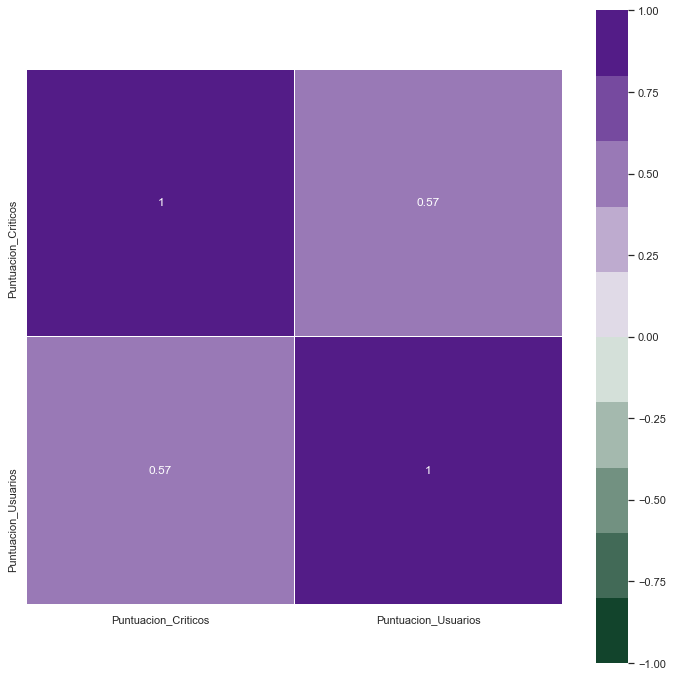

In [25]:
#Correlacion Shooter
filtro_Shooter = df[df.Genero == "Shooter"]
filtro_Shooter_corr = filtro_Shooter[["Puntuacion_Criticos", "Puntuacion_Usuarios"]] 
plt.figure(figsize=(12,12))
sns.heatmap(filtro_Shooter_corr.corr(), 
            vmin = -1, 
            vmax = 1, 
            cmap = sns.diverging_palette(145, 280, s=85, l=25, n=10), 
            annot = True,
           square = True,
           linewidths = .5);

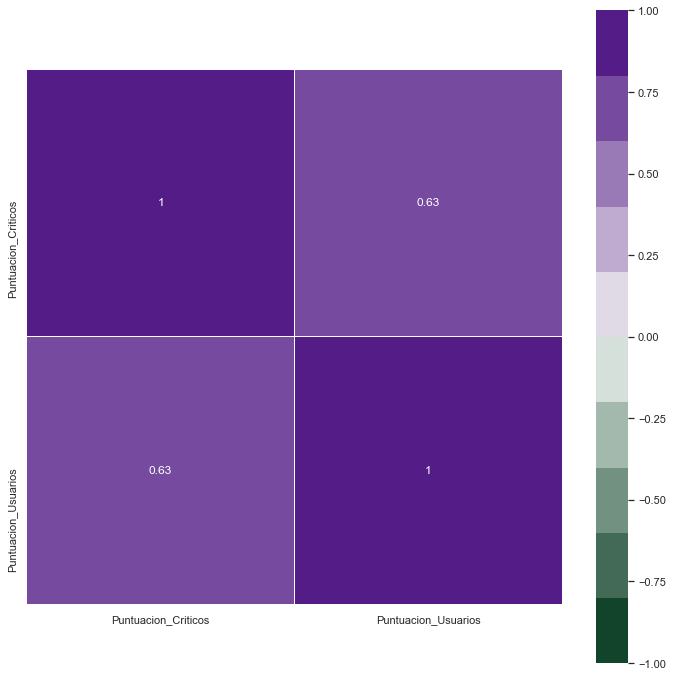

In [26]:
#Correlacion Simulacion
filtro_Simulation = df[df.Genero == "Simulation"]
filtro_Simulation_corr = filtro_Simulation[["Puntuacion_Criticos", "Puntuacion_Usuarios"]] 
plt.figure(figsize=(12,12))
sns.heatmap(filtro_Simulation_corr.corr(), 
            vmin = -1, 
            vmax = 1, 
            cmap = sns.diverging_palette(145, 280, s=85, l=25, n=10), 
            annot = True,
           square = True,
           linewidths = .5);

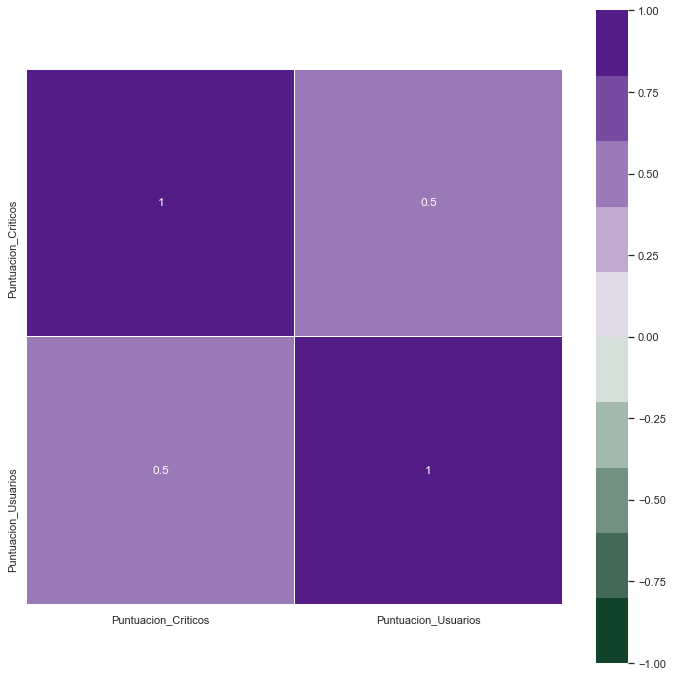

In [27]:
#Correlacion Role-Playing
filtro_Role_Playing = df[df.Genero == "Role-Playing"]
filtro_Role_Playing_corr = filtro_Role_Playing[["Puntuacion_Criticos", "Puntuacion_Usuarios"]] 
plt.figure(figsize=(12,12))
sns.heatmap(filtro_Role_Playing_corr.corr(), 
            vmin = -1, 
            vmax = 1, 
            cmap = sns.diverging_palette(145, 280, s=85, l=25, n=10), 
            annot = True,
           square = True,
           linewidths = .5);

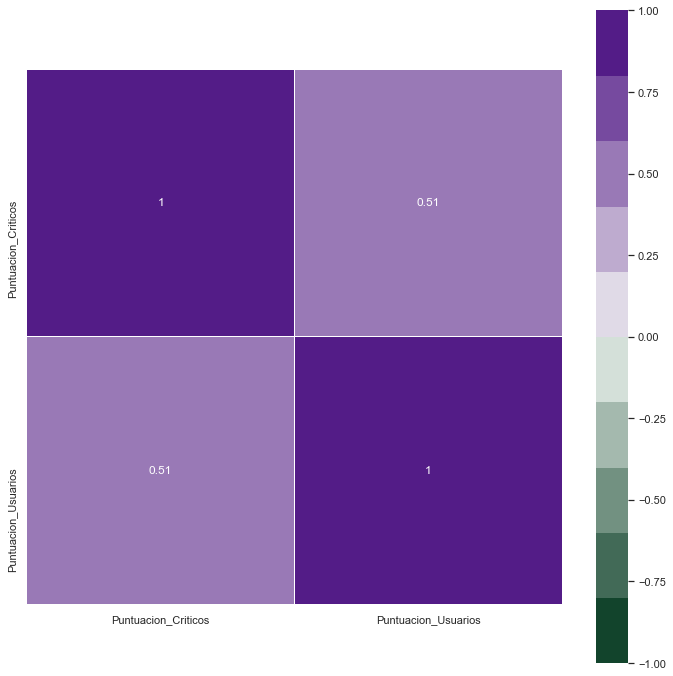

In [28]:
#Correlacion Deportes
filtro_sports = df[df.Genero == "Sports"]
filtro_sports_corr = filtro_sports[["Puntuacion_Criticos", "Puntuacion_Usuarios"]]
plt.figure(figsize=(12,12))
sns.heatmap(filtro_sports_corr.corr(), 
            vmin = -1, 
            vmax = 1, 
            cmap = sns.diverging_palette(145, 280, s=85, l=25, n=10), 
            annot = True,
           square = True,
           linewidths = .5);

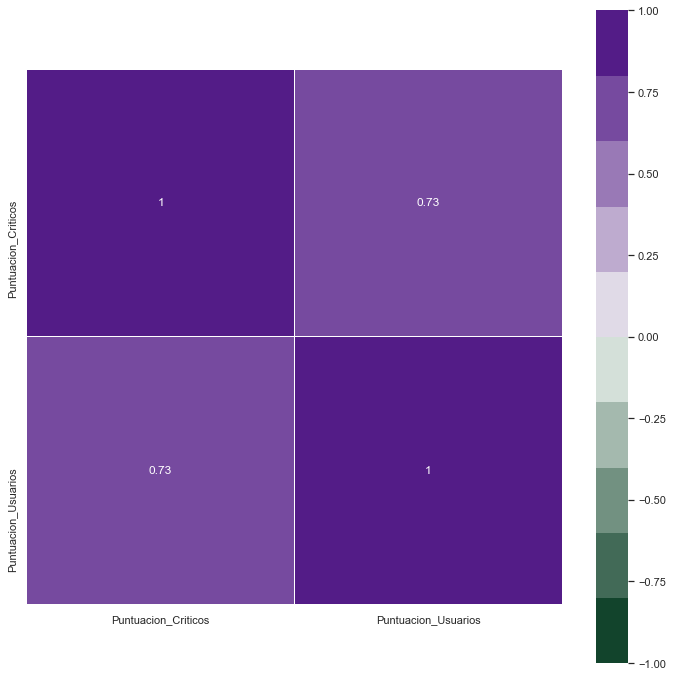

In [29]:
#Correlacion Aventuras
filtro_Adventure = df[df.Genero == "Adventure"]
filtro_Adventure_corr = filtro_Adventure[["Puntuacion_Criticos", "Puntuacion_Usuarios"]]
plt.figure(figsize=(12,12))
sns.heatmap(filtro_Adventure_corr.corr(), 
            vmin = -1, 
            vmax = 1, 
            cmap = sns.diverging_palette(145, 280, s=85, l=25, n=10), 
            annot = True,
           square = True,
           linewidths = .5);

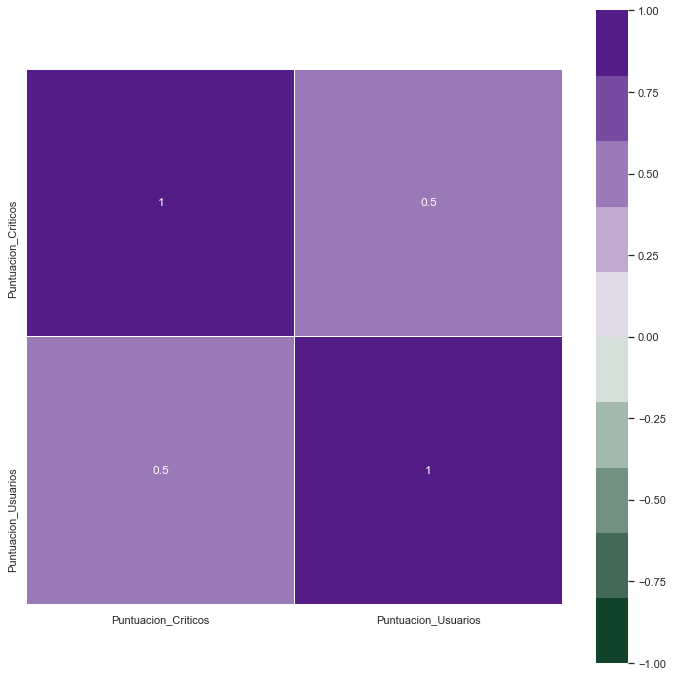

In [30]:
#Correlacion Strategy
filtro_Strategy = df[df.Genero == "Strategy"]
filtro_Strategy_corr = filtro_Strategy[["Puntuacion_Criticos", "Puntuacion_Usuarios"]]
plt.figure(figsize=(12,12))
sns.heatmap(filtro_Strategy_corr.corr(), 
            vmin = -1, 
            vmax = 1, 
            cmap = sns.diverging_palette(145, 280, s=85, l=25, n=10), 
            annot = True,
           square = True,
           linewidths = .5);

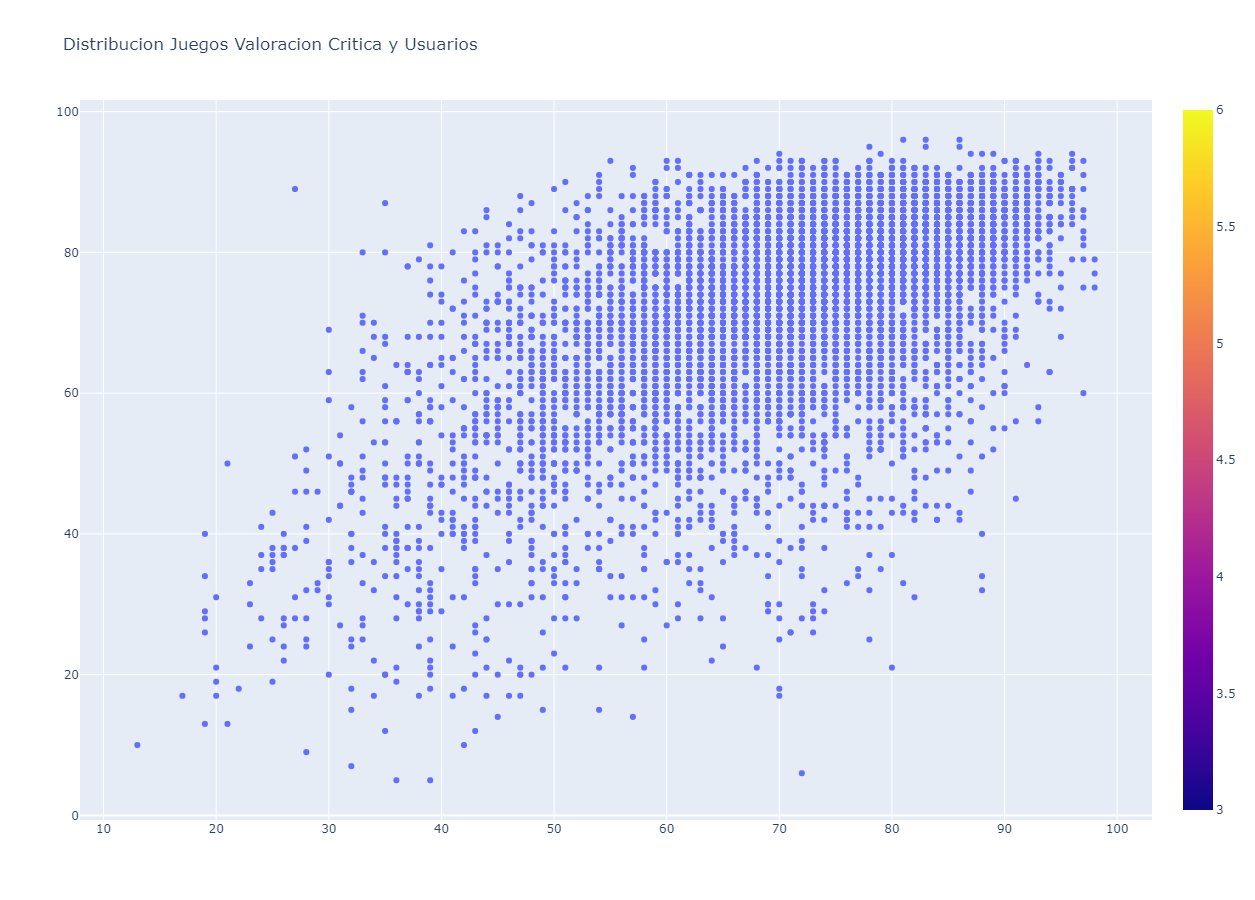

In [32]:
#Distribucion de Juegos Valoracion Critica y Usuarios

from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly import tools
import matplotlib.pyplot as plt
data = [
    {
        'x': df.Puntuacion_Criticos,
        'y': df.Puntuacion_Usuarios,
        'mode': 'markers',
        'marker': {
           # 'color': df['Critic_Score'],
            #'size': df['User_Score']/10,
            'showscale': True
        }, 
        "text" : df['Nombre']
    }
]
layout = dict(title = 'Distribucion Juegos Valoracion Critica y Usuarios',
              xaxis= dict(ticklen= 10, zeroline= False),
              width = 900,
              height = 900
             )
fig = dict(data = data, layout = layout)
iplot(fig)



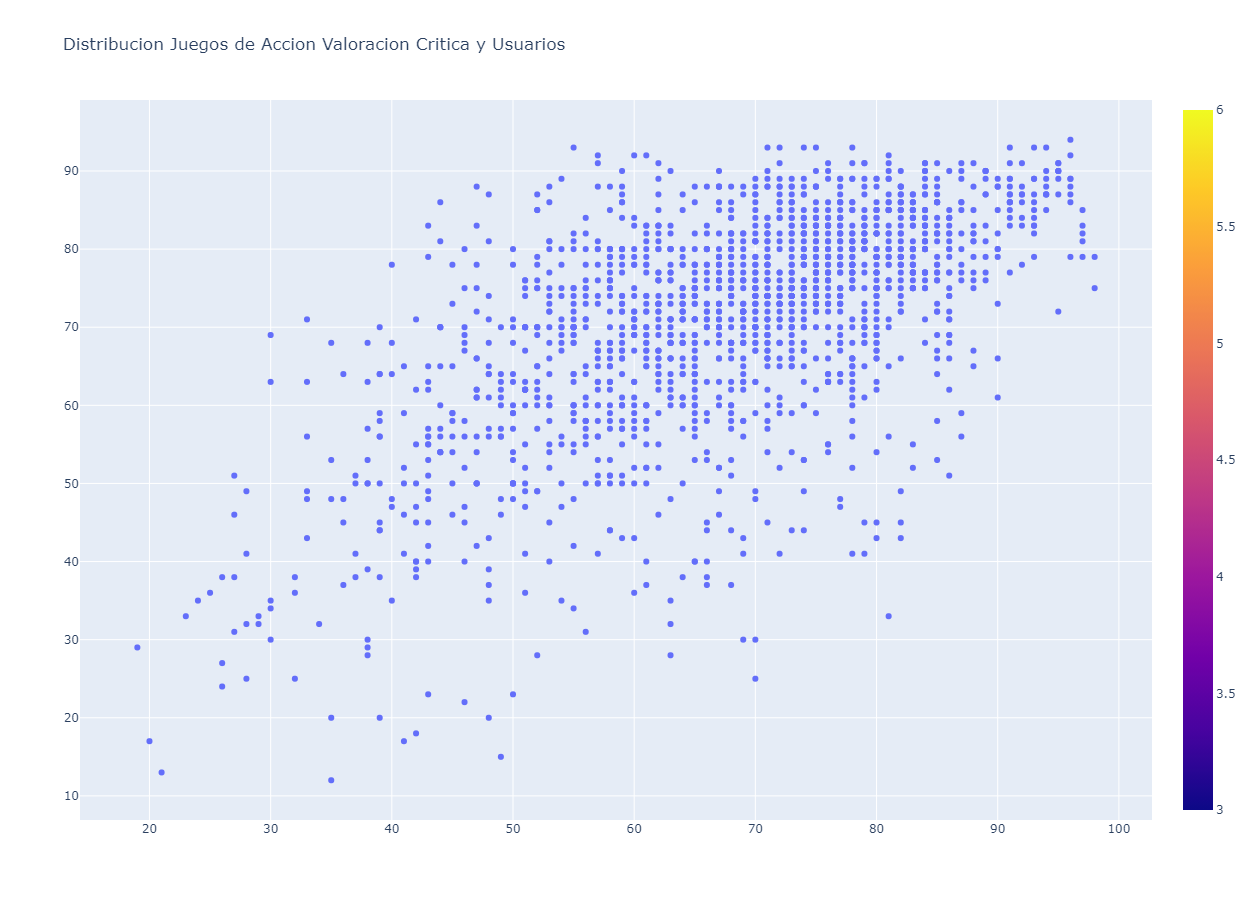

In [52]:
#Distribucion de Juegos Valoracion Critica y Usuarios juegos de Accion
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly import tools
import matplotlib.pyplot as plt
data = [
    {
        'x': filtro_Action.Puntuacion_Criticos,
        'y': filtro_Action.Puntuacion_Usuarios,
        'mode': 'markers',
        'marker': {
           # 'color': df['Critic_Score'],
            #'size': df['User_Score']/10,
            'showscale': True
        }, 
        "text" : filtro_Action['Nombre']
    }
]
layout = dict(title = 'Distribucion Juegos de Accion Valoracion Critica y Usuarios',
              xaxis= dict(ticklen= 10, zeroline= False),
              width = 900,
              height = 900
             )
fig = dict(data = data, layout = layout)
iplot(fig)

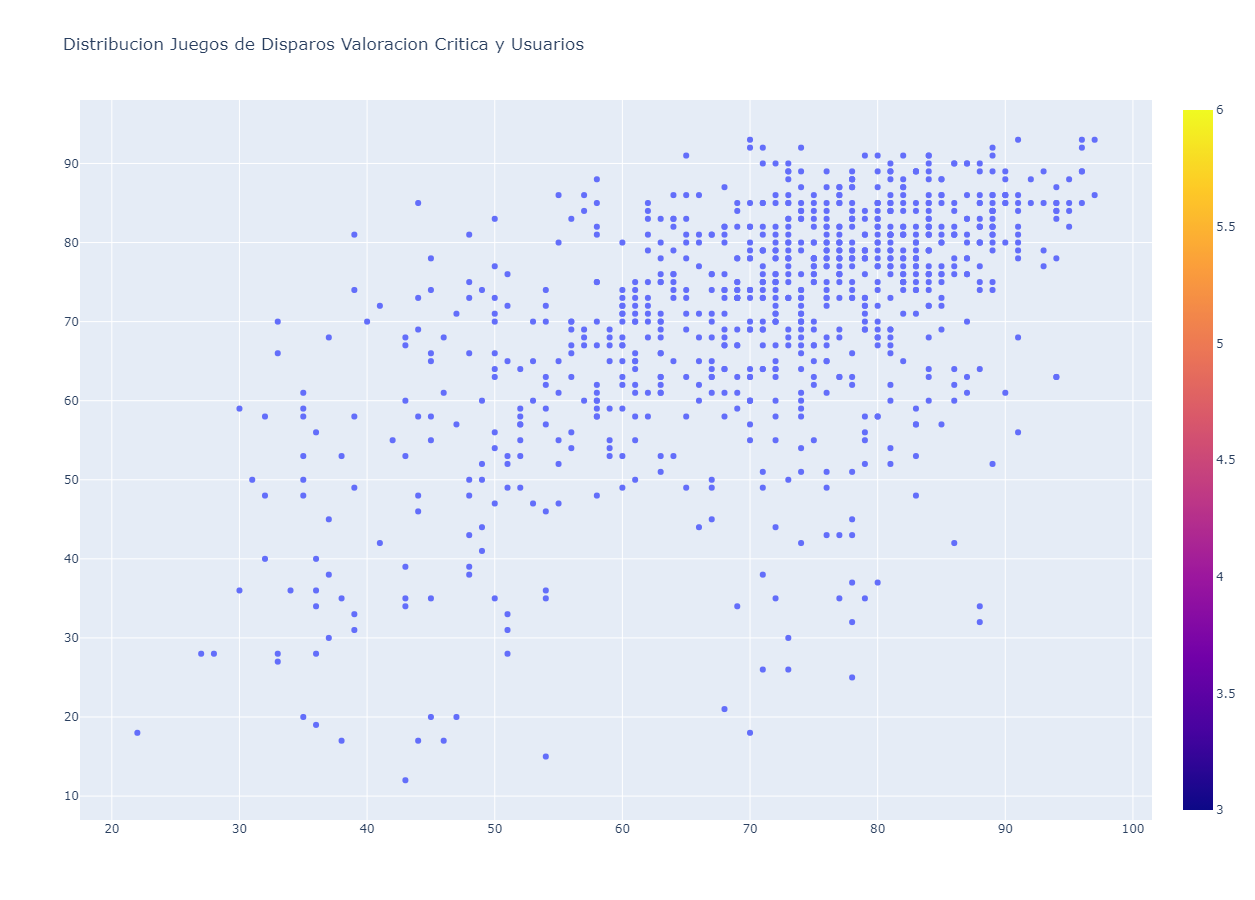

In [51]:
#Distribucion de Juegos Valoracion Critica y Usuarios juegos de Disparos
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly import tools
import matplotlib.pyplot as plt
data = [
    {
        'x': filtro_Shooter.Puntuacion_Criticos,
        'y': filtro_Shooter.Puntuacion_Usuarios,
        'mode': 'markers',
        'marker': {
           # 'color': df['Critic_Score'],
            #'size': df['User_Score']/10,
            'showscale': True
        }, 
        "text" : filtro_Shooter['Nombre']
    }
]
layout = dict(title = 'Distribucion Juegos de Disparos Valoracion Critica y Usuarios',
              xaxis= dict(ticklen= 10, zeroline= False),
              width = 900,
              height = 900
             )
fig = dict(data = data, layout = layout)
iplot(fig)

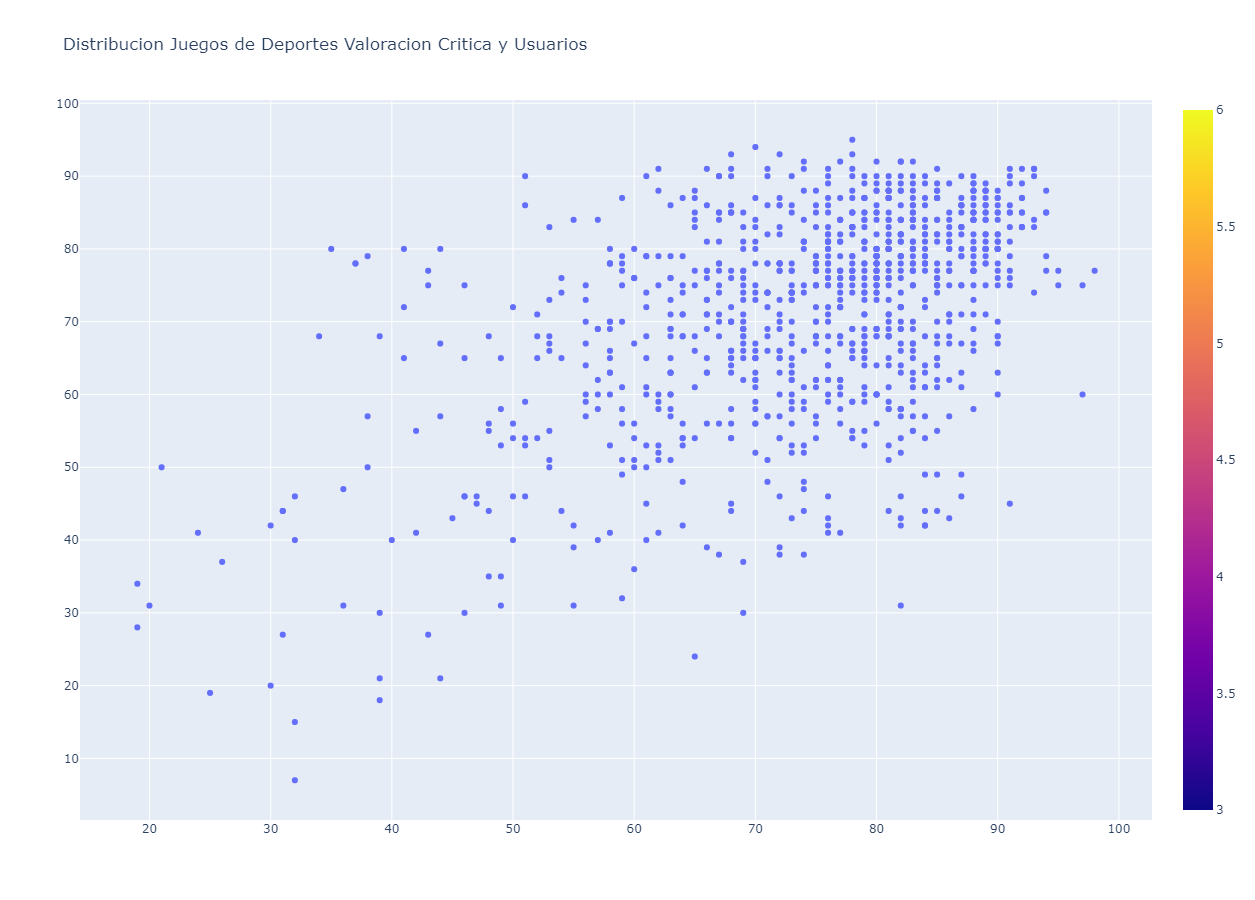

In [53]:
#Distribucion de Juegos Valoracion Critica y Usuarios juegos de Deportes
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly import tools
import matplotlib.pyplot as plt
data = [
    {
        'x': filtro_sports.Puntuacion_Criticos,
        'y': filtro_sports.Puntuacion_Usuarios,
        'mode': 'markers',
        'marker': {
           # 'color': df['Critic_Score'],
            #'size': df['User_Score']/10,
            'showscale': True
        }, 
        "text" : filtro_sports['Nombre']
    }
]
layout = dict(title = 'Distribucion Juegos de Deportes Valoracion Critica y Usuarios',
              xaxis= dict(ticklen= 10, zeroline= False),
              width = 900,
              height = 900
             )
fig = dict(data = data, layout = layout)
iplot(fig)

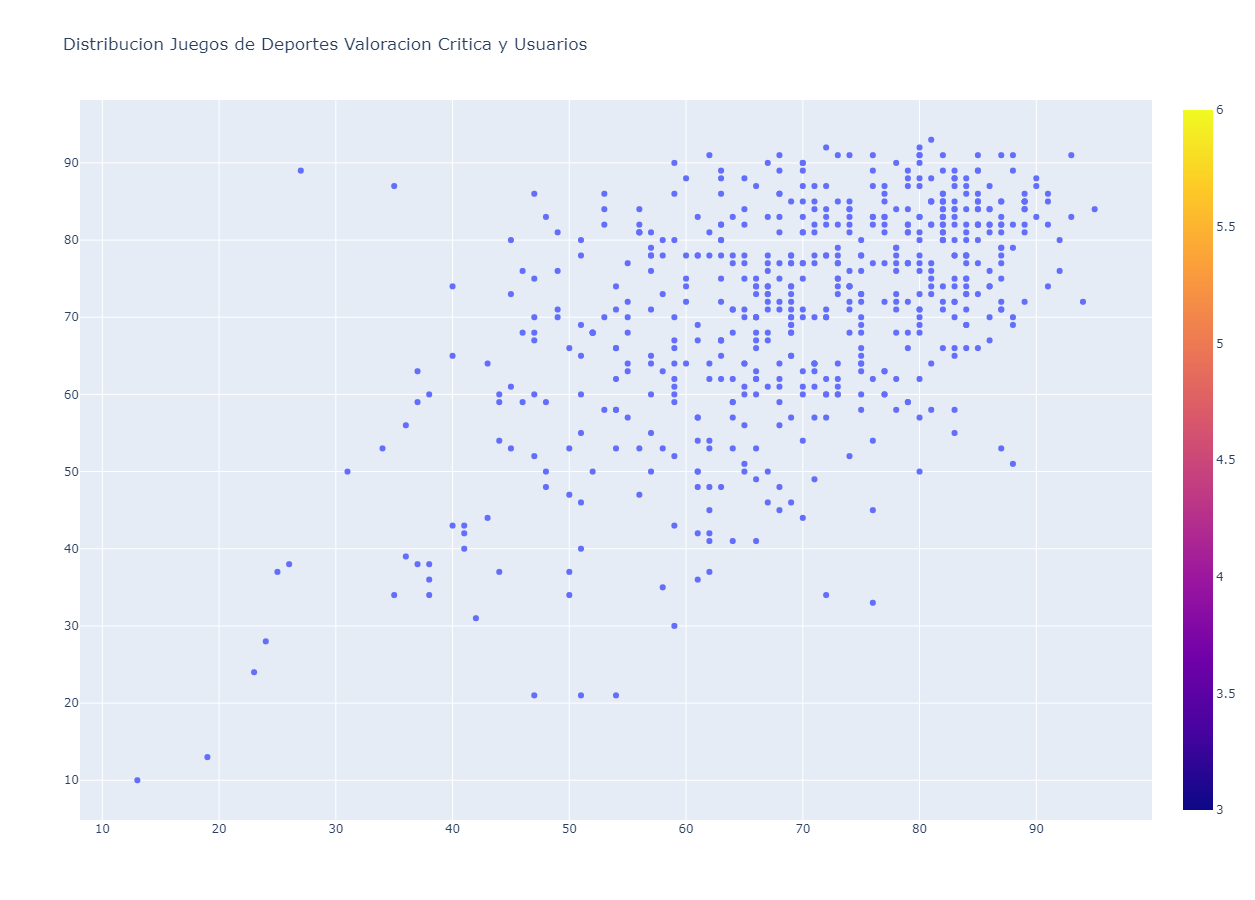

In [54]:
#Distribucion de Juegos Valoracion Critica y Usuarios juegos de Carreras
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly import tools
import matplotlib.pyplot as plt
data = [
    {
        'x': filtro_racing.Puntuacion_Criticos,
        'y': filtro_racing.Puntuacion_Usuarios,
        'mode': 'markers',
        'marker': {
           # 'color': df['Critic_Score'],
            #'size': df['User_Score']/10,
            'showscale': True
        }, 
        "text" : filtro_racing['Nombre']
    }
]
layout = dict(title = 'Distribucion Juegos de Carreras Valoracion Critica y Usuarios',
              xaxis= dict(ticklen= 10, zeroline= False),
              width = 900,
              height = 900
             )
fig = dict(data = data, layout = layout)
iplot(fig)

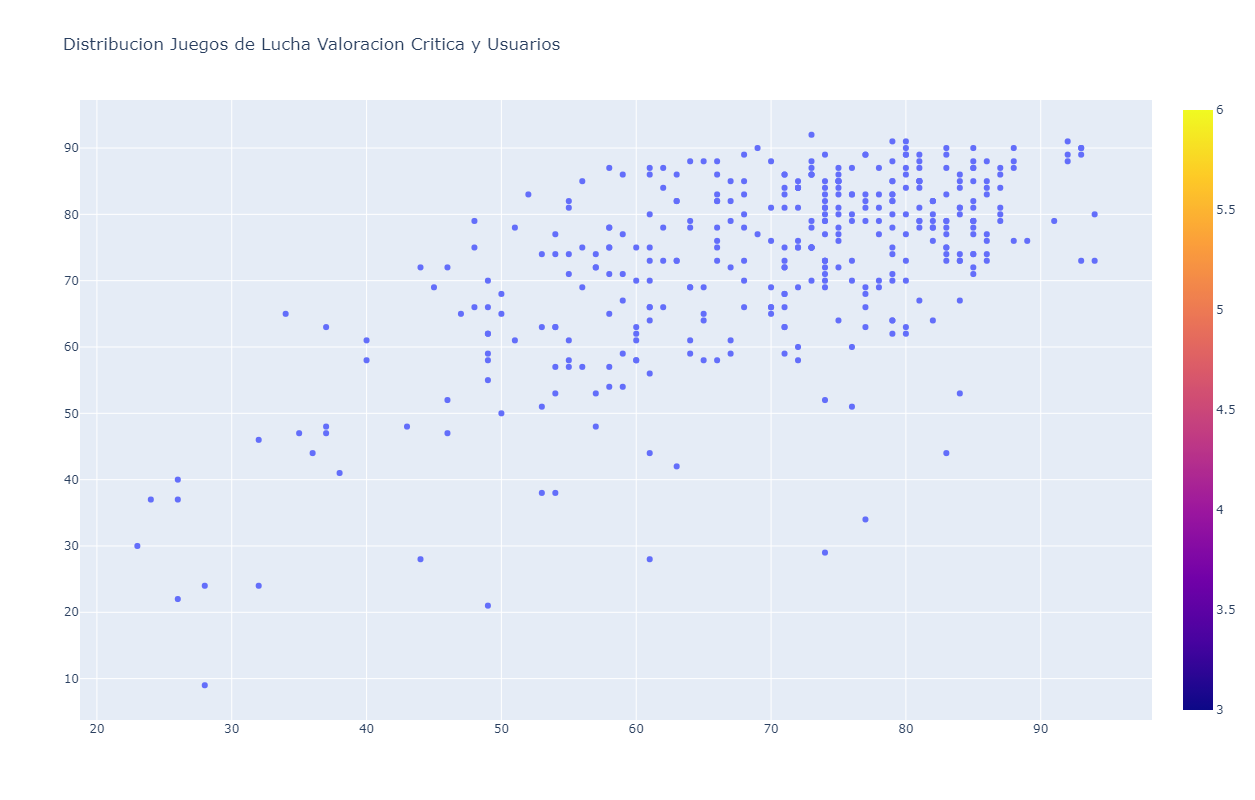

In [63]:
#Distribucion de Juegos Valoracion Critica y Usuarios juegos de Lucha
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly import tools
import matplotlib.pyplot as plt
data = [
    {
        'x': filtro_lucha.Puntuacion_Criticos,
        'y': filtro_lucha.Puntuacion_Usuarios,
        'mode': 'markers',
        'marker': {
           # 'color': df['Critic_Score'],
            #'size': df['User_Score']/10,
            'showscale': True
        }, 
        "text" : filtro_lucha['Nombre']
    }
]
layout = dict(title = 'Distribucion Juegos de Lucha Valoracion Critica y Usuarios',
              xaxis= dict(ticklen= 10, zeroline= False),
              width = 800,
              height = 800
             )
fig = dict(data = data, layout = layout)
iplot(fig)

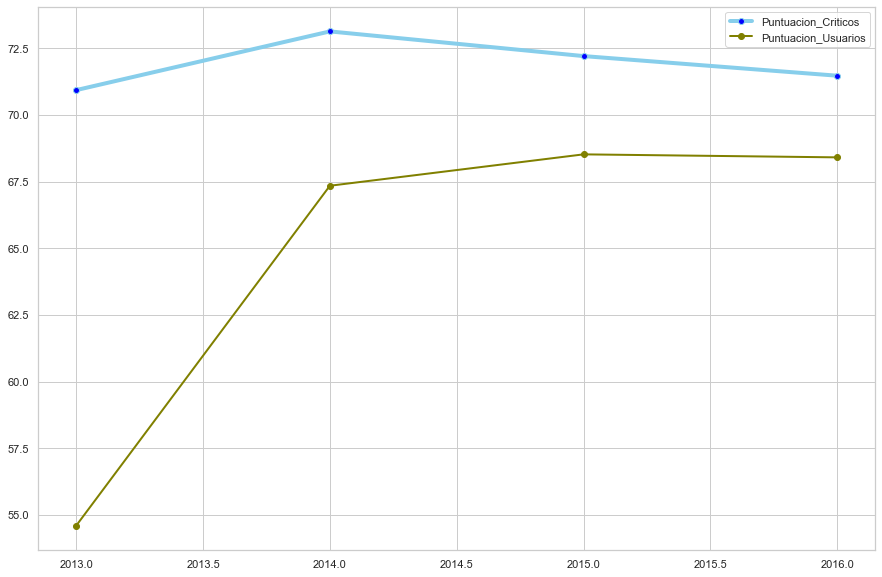

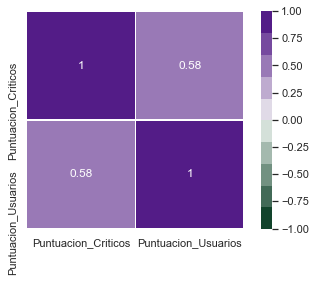

In [33]:
#Histograma evolucion critica usuarios y profesionales y heatmap
filtro_ps4_hist = df[df.Plataforma == "PS4"]
filtro_ps4_hist2  = filtro_ps4_hist[["Nombre", "Plataforma", "Año_de_Salida", "Puntuacion_Criticos", "Puntuacion_Usuarios", "Ventas_Globales"
]]
filtro_ps4_group = filtro_ps4_hist2.groupby("Año_de_Salida")[["Año_de_Salida", "Puntuacion_Criticos", "Puntuacion_Usuarios"]].mean()
# multiple line plots
plt.figure(figsize=(15,10))
plt.plot( "Año_de_Salida", "Puntuacion_Criticos", data=filtro_ps4_group , marker='o', markerfacecolor='blue', color='skyblue', linewidth=4)
plt.plot( "Año_de_Salida", "Puntuacion_Usuarios", data=filtro_ps4_group , marker='o', color='olive', linewidth=2)
# show legend
plt.legend()

# show graph


plt.show()

filtro_PS4_corr = df[df.Plataforma == "PS4"]
heatmap_PS4= filtro_PS4_corr[["Puntuacion_Criticos", "Puntuacion_Usuarios"]]
sns.heatmap(heatmap_PS4.corr(), 
            vmin = -1, 
            vmax = 1, 
            cmap = sns.diverging_palette(145, 280, s=85, l=25, n=10), 
            annot = True,
           square = True,
           linewidths = .5);

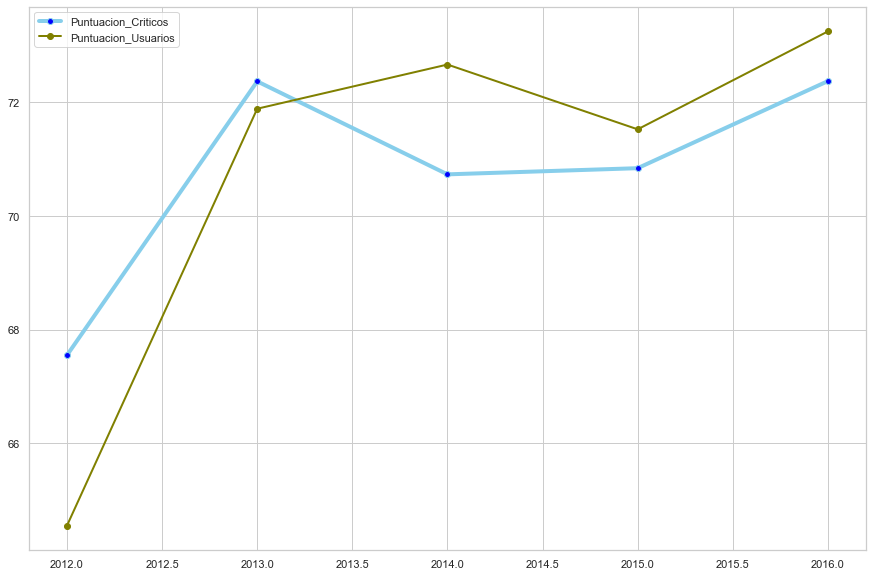

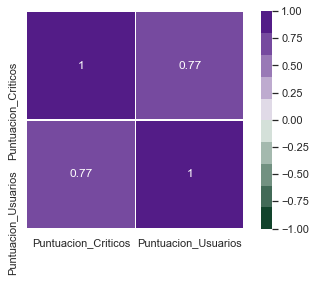

In [34]:
#Histograma evolucion critica usuarios y profesionales Consolas generacion actual WiiU
filtro_wiiu_hist = df[df.Plataforma == "WiiU"]
filtro_wiiu_hist2  = filtro_wiiu_hist[["Nombre", "Plataforma", "Año_de_Salida", "Puntuacion_Criticos", "Puntuacion_Usuarios", "Ventas_Globales"]]
filtro_wiiu_group = filtro_wiiu_hist2.groupby("Año_de_Salida")[["Año_de_Salida", "Puntuacion_Criticos", "Puntuacion_Usuarios"]].mean()
# multiple line plots
plt.figure(figsize=(15,10))
plt.plot( 'Año_de_Salida', 'Puntuacion_Criticos', data=filtro_wiiu_group , marker='o', markerfacecolor='blue', color='skyblue', linewidth=4)
plt.plot( 'Año_de_Salida', 'Puntuacion_Usuarios', data=filtro_wiiu_group , marker='o', color='olive', linewidth=2)

# show legend
plt.legend()

# show graph


plt.show()

filtro_WiiU_corr = df[df.Plataforma == "WiiU"]
heatmap_WiiU= filtro_WiiU_corr[['Puntuacion_Criticos', 'Puntuacion_Usuarios']]
sns.heatmap(heatmap_WiiU.corr(), 
            vmin = -1, 
            vmax = 1, 
            cmap = sns.diverging_palette(145, 280, s=85, l=25, n=10), 
            annot = True,
           square = True,
           linewidths = .5);

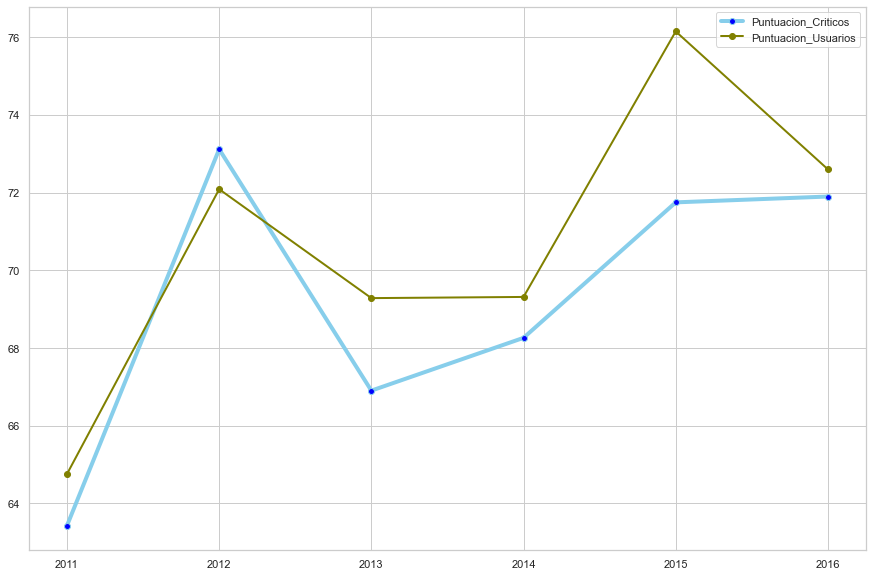

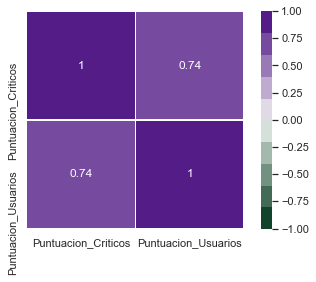

In [35]:
#Histograma evolucion critica usuarios y profesionales Consolas generacion actual 3DS
filtro_3DS_hist = df[df.Plataforma == "3DS"]
filtro_3DS_hist2  = filtro_3DS_hist[["Nombre", "Plataforma", "Año_de_Salida", "Puntuacion_Criticos", "Puntuacion_Usuarios", "Ventas_Globales"]]
filtro_3DS_group = filtro_3DS_hist2.groupby("Año_de_Salida")[["Año_de_Salida", "Puntuacion_Criticos", "Puntuacion_Usuarios"]].mean()
# multiple line plots
plt.figure(figsize=(15,10))
plt.plot( 'Año_de_Salida', 'Puntuacion_Criticos', data=filtro_3DS_group , marker='o', markerfacecolor='blue', color='skyblue', linewidth=4)
plt.plot( 'Año_de_Salida', 'Puntuacion_Usuarios', data=filtro_3DS_group , marker='o', color='olive', linewidth=2)

# show legend
plt.legend()

# show graph


plt.show()


filtro_3DS_corr = df[df.Plataforma == "3DS"]
heatmap_3DS= filtro_3DS_corr[['Puntuacion_Criticos', 'Puntuacion_Usuarios']]
sns.heatmap(heatmap_3DS.corr(), 
            vmin = -1, 
            vmax = 1, 
            cmap = sns.diverging_palette(145, 280, s=85, l=25, n=10), 
            annot = True,
           square = True,
           linewidths = .5);

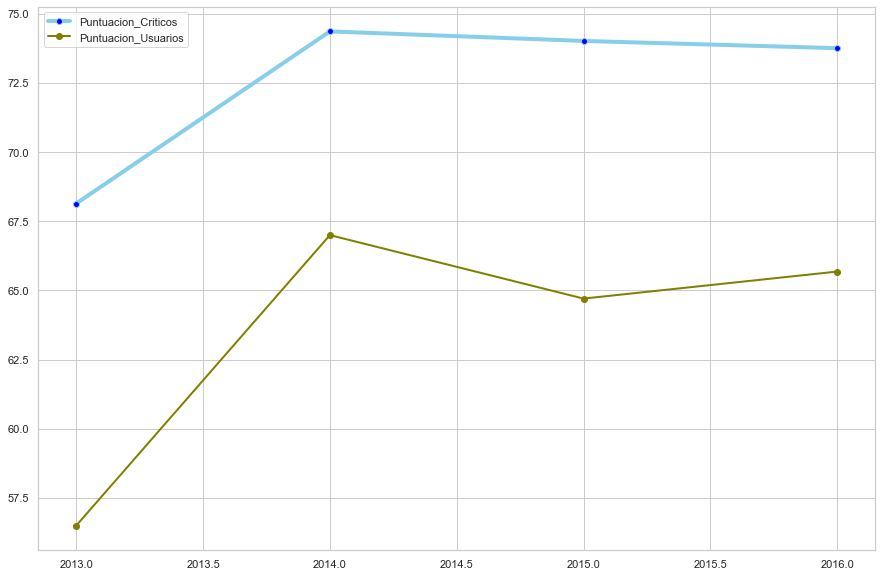

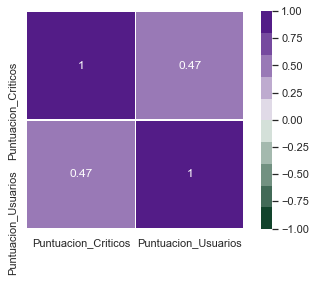

In [36]:
#Histograma evolucion critica usuarios y profesionales Consolas generacion actual XOne
filtro_XOne_hist = df[df.Plataforma == "XOne"]
filtro_XOne_hist2  = filtro_XOne_hist[["Nombre", "Plataforma", "Año_de_Salida", "Puntuacion_Criticos", "Puntuacion_Usuarios", "Ventas_Globales"]]
filtro_XOne_group = filtro_XOne_hist2.groupby("Año_de_Salida")[["Año_de_Salida", "Puntuacion_Criticos", "Puntuacion_Usuarios"]].mean()
# multiple line plots
plt.figure(figsize=(15,10))
plt.plot( 'Año_de_Salida', 'Puntuacion_Criticos', data=filtro_XOne_group , marker='o', markerfacecolor='blue', color='skyblue', linewidth=4)
plt.plot( 'Año_de_Salida', 'Puntuacion_Usuarios', data=filtro_XOne_group , marker='o', color='olive', linewidth=2)

# show legend
plt.legend()

# show graph


plt.show()
filtro_XOne_corr = df[df.Plataforma == "XOne"]
heatmap_XOne= filtro_XOne_corr[['Puntuacion_Criticos', 'Puntuacion_Usuarios']]
sns.heatmap(heatmap_XOne.corr(), 
            vmin = -1, 
            vmax = 1, 
            cmap = sns.diverging_palette(145, 280, s=85, l=25, n=10), 
            annot = True,
           square = True,
           linewidths = .5);

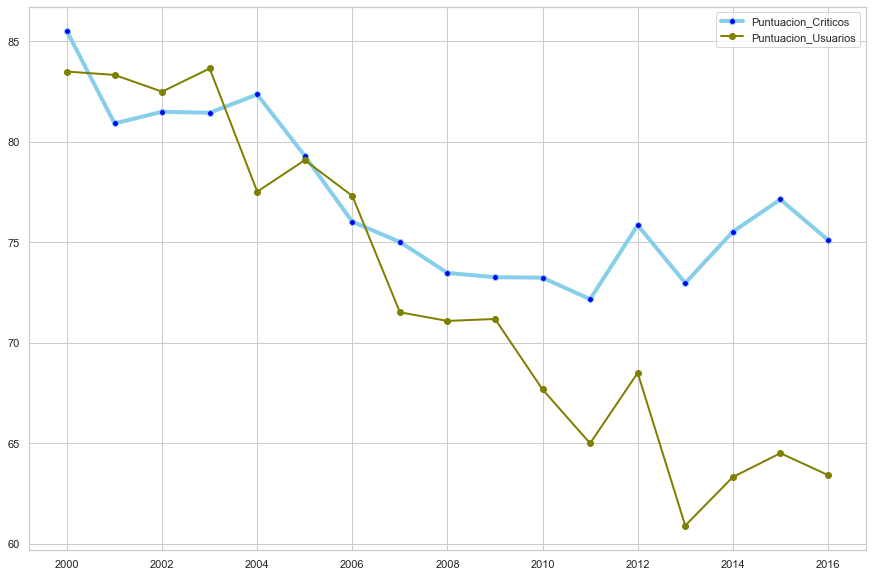

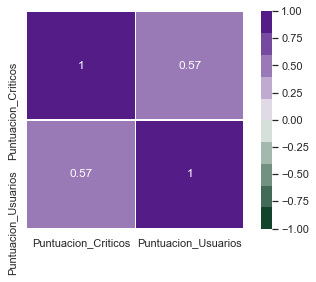

In [37]:
#Histograma evolucion critica usuarios y profesionales Consolas generacion actual XOne
filtro_PC_hist = df[df.Plataforma == "PC"]
filtro_PC_hist2  = filtro_PC_hist[["Nombre", "Plataforma", "Año_de_Salida", "Puntuacion_Criticos", "Puntuacion_Usuarios", "Ventas_Globales"]]
filtro_PC_group = filtro_PC_hist2.groupby("Año_de_Salida")[["Año_de_Salida", "Puntuacion_Criticos", "Puntuacion_Usuarios"]].mean()
# multiple line plots
plt.figure(figsize=(15,10))
plt.plot( 'Año_de_Salida', 'Puntuacion_Criticos', data=filtro_PC_group , marker='o', markerfacecolor='blue', color='skyblue', linewidth=4)
plt.plot( 'Año_de_Salida', 'Puntuacion_Usuarios', data=filtro_PC_group , marker='o', color='olive', linewidth=2)

# show legend
plt.legend()

# show graph


plt.show()

filtro_PC_corr = df[df.Plataforma == "PC"]
heatmap_PC= filtro_PC_corr[['Puntuacion_Criticos', 'Puntuacion_Usuarios']]
sns.heatmap(heatmap_PC.corr(), 
            vmin = -1, 
            vmax = 1, 
            cmap = sns.diverging_palette(145, 280, s=85, l=25, n=10), 
            annot = True,
           square = True,
           linewidths = .5);

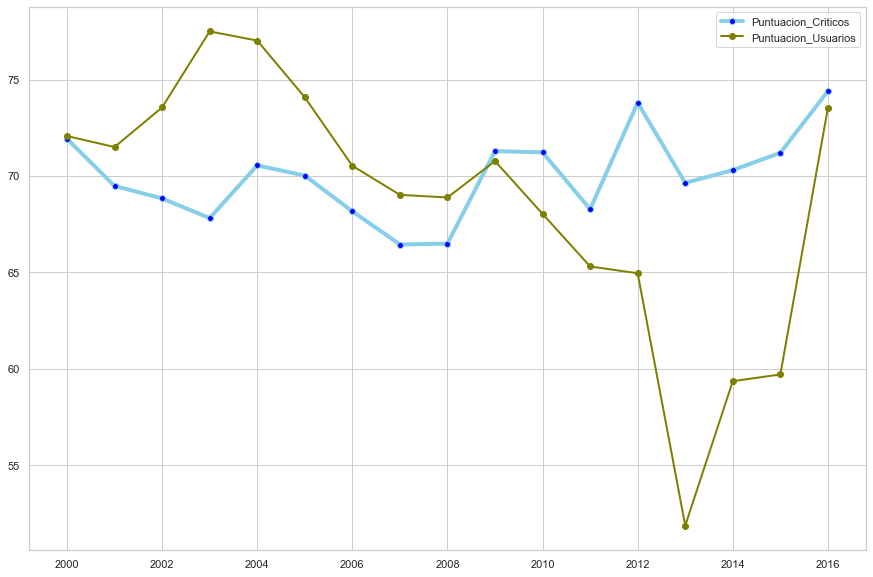

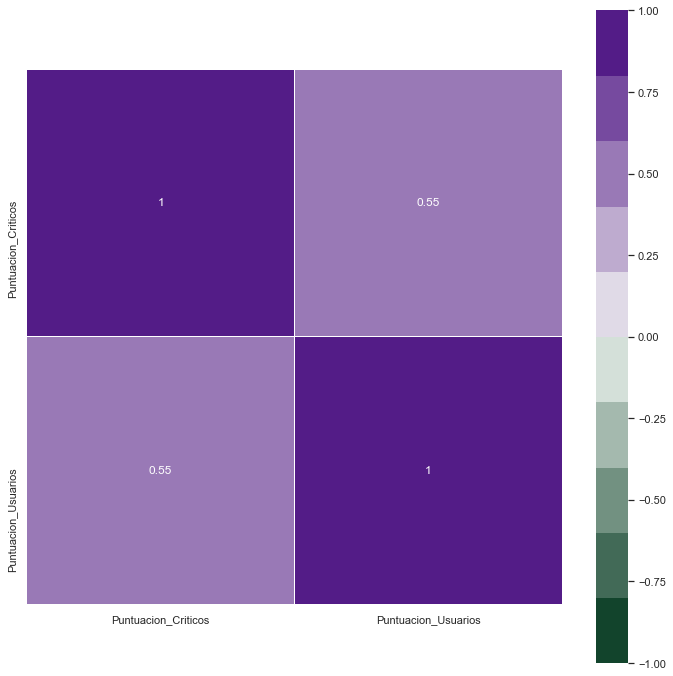

In [38]:
#Correlacion Racing
filtro_racing_hist = df[df.Genero == "Racing"]
filtro_racing_corr_hist = filtro_racing_hist[["Año_de_Salida","Puntuacion_Criticos","Puntuacion_Usuarios"]]
filtro_racing_group = filtro_racing_corr_hist.groupby("Año_de_Salida")[[
"Año_de_Salida","Puntuacion_Criticos","Puntuacion_Usuarios"]].mean()
# multiple line plots
plt.figure(figsize=(15,10))
plt.plot( "Año_de_Salida", 'Puntuacion_Criticos', data=filtro_racing_group , marker='o', markerfacecolor='blue', color='skyblue', linewidth=4)
plt.plot( "Año_de_Salida", "Puntuacion_Usuarios", data=filtro_racing_group , marker='o', color='olive', linewidth=2)

# show legend
plt.legend()

# show graph


plt.show()





plt.figure(figsize=(12,12))
sns.heatmap(filtro_racing_corr.corr(), 
            vmin = -1, 
            vmax = 1, 
            cmap = sns.diverging_palette(145, 280, s=85, l=25, n=10), 
            annot = True,
           square = True,
           linewidths = .5);

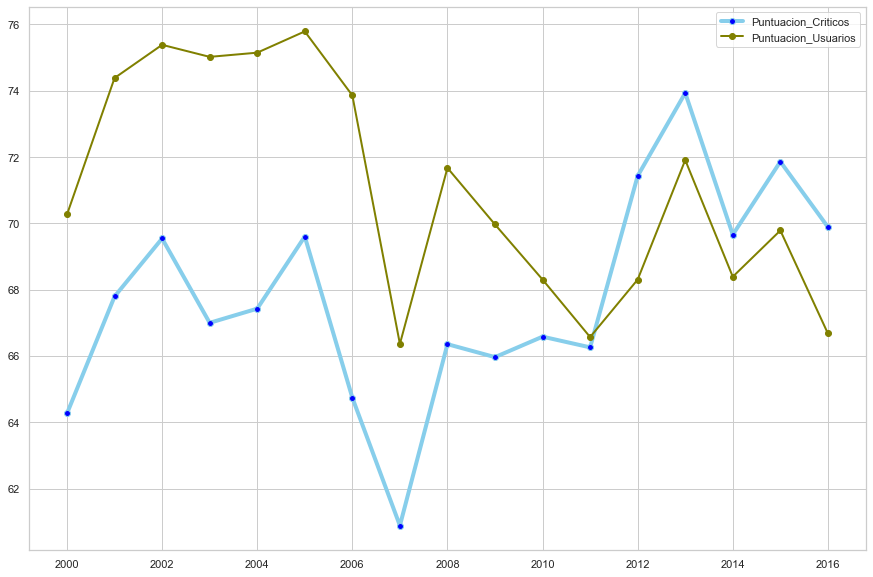

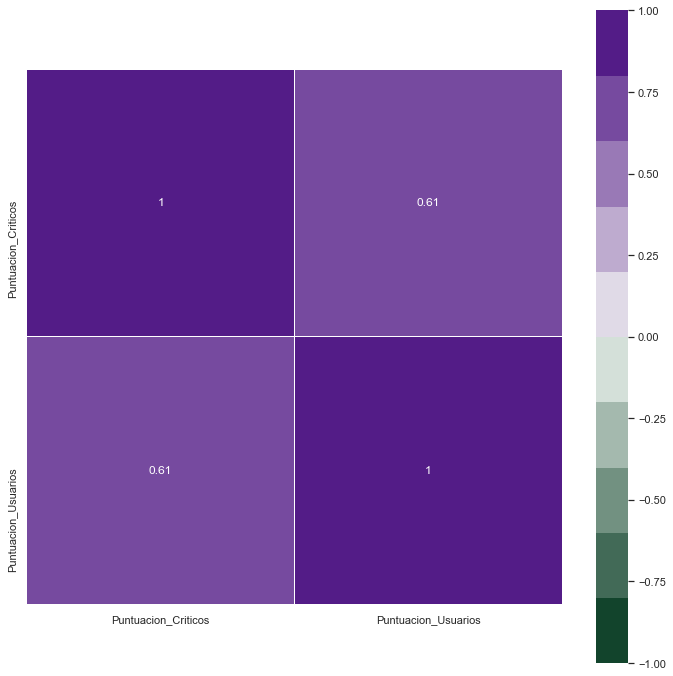

In [39]:
#Correlacion Action
filtro_Action_hist = df[df.Genero == "Action"]
filtro_Action_corr_hist = filtro_Action_hist[["Año_de_Salida","Puntuacion_Criticos","Puntuacion_Usuarios"]]
filtro_Action_group = filtro_Action_corr_hist.groupby("Año_de_Salida")[[
"Año_de_Salida","Puntuacion_Criticos","Puntuacion_Usuarios"]].mean()
# multiple line plots
plt.figure(figsize=(15,10))
plt.plot( "Año_de_Salida", 'Puntuacion_Criticos', data=filtro_Action_group , marker='o', markerfacecolor='blue', color='skyblue', linewidth=4)
plt.plot( "Año_de_Salida", 'Puntuacion_Usuarios', data=filtro_Action_group , marker='o', color='olive', linewidth=2)

# show legend
plt.legend()

# show graph


plt.show()





plt.figure(figsize=(12,12))
sns.heatmap(filtro_Action_corr.corr(), 
            vmin = -1, 
            vmax = 1, 
            cmap = sns.diverging_palette(145, 280, s=85, l=25, n=10), 
            annot = True,
           square = True,
           linewidths = .5);

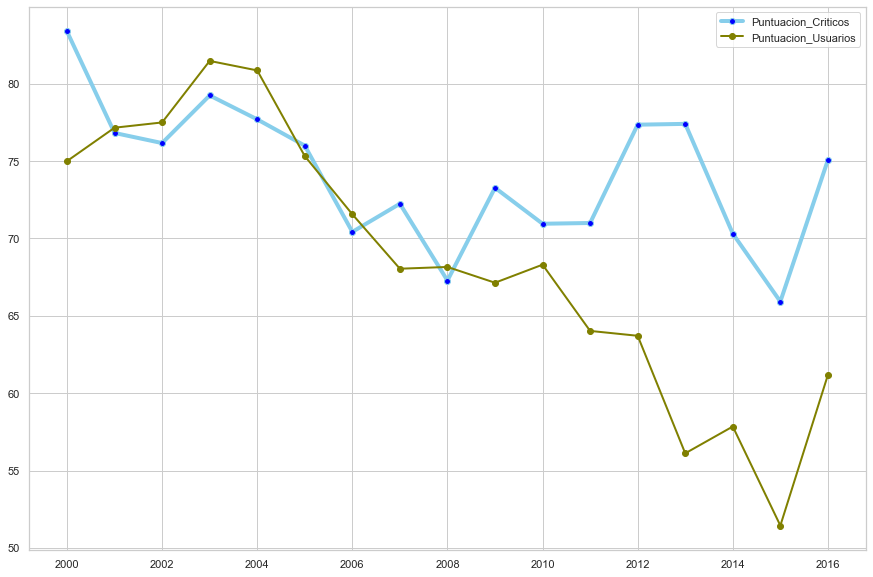

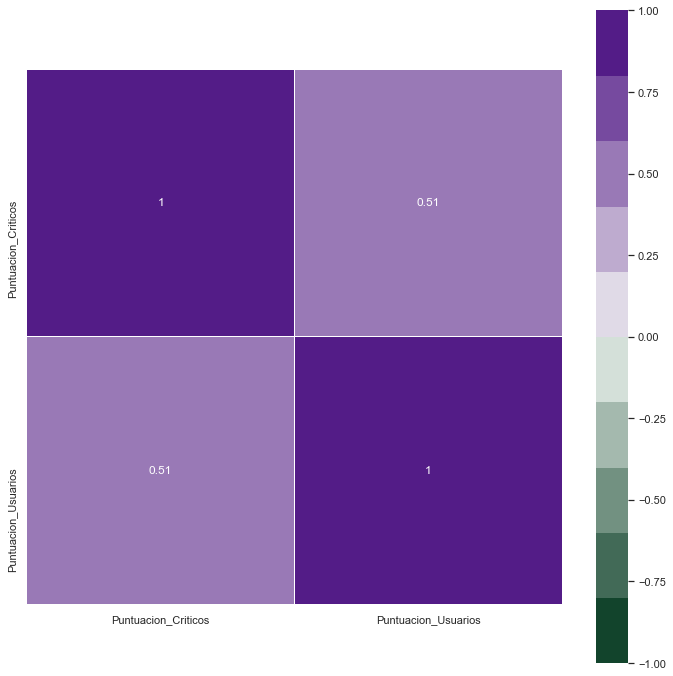

In [40]:
#Correlacion Sports
filtro_Sports_hist = df[df.Genero == "Sports"]
filtro_Sports_corr_hist = filtro_Sports_hist[["Año_de_Salida","Puntuacion_Criticos","Puntuacion_Usuarios"]]
filtro_Sports_group = filtro_Sports_corr_hist.groupby("Año_de_Salida")[[
"Año_de_Salida","Puntuacion_Criticos","Puntuacion_Usuarios"]].mean()
# multiple line plots
plt.figure(figsize=(15,10))
plt.plot( "Año_de_Salida", 'Puntuacion_Criticos', data=filtro_Sports_group , marker='o', markerfacecolor='blue', color='skyblue', linewidth=4)
plt.plot( "Año_de_Salida", 'Puntuacion_Usuarios', data=filtro_Sports_group , marker='o', color='olive', linewidth=2)

# show legend
plt.legend()

# show graph


plt.show()





plt.figure(figsize=(12,12))
sns.heatmap(filtro_sports_corr.corr(), 
            vmin = -1, 
            vmax = 1, 
            cmap = sns.diverging_palette(145, 280, s=85, l=25, n=10), 
            annot = True,
           square = True,
           linewidths = .5);

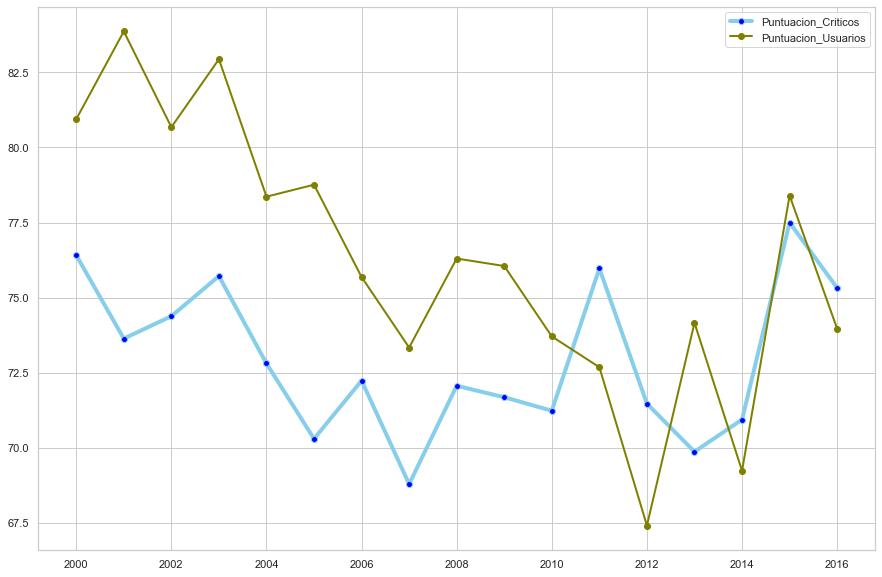

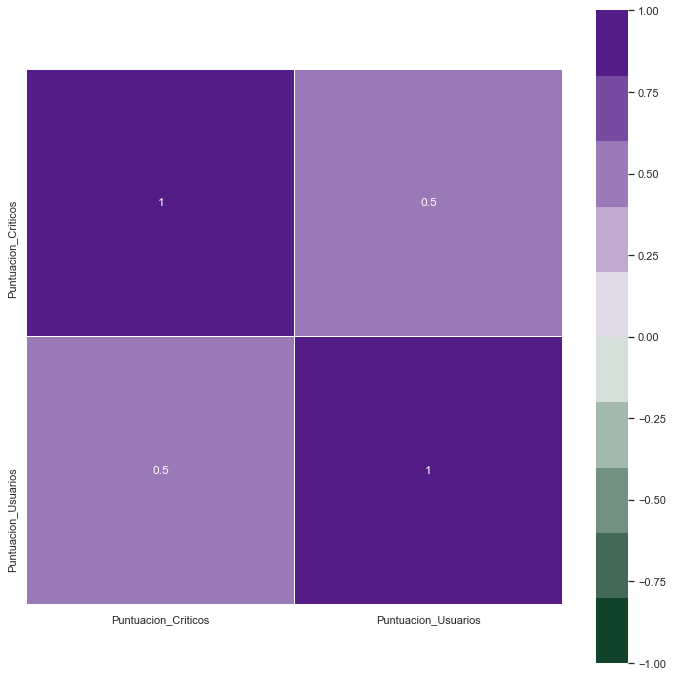

In [41]:
#Correlacion Role-Playing
filtro_Role_Playing_hist = df[df.Genero == "Role-Playing"]
filtro_Role_Playing_corr_hist = filtro_Role_Playing_hist[["Año_de_Salida","Puntuacion_Criticos","Puntuacion_Usuarios"]]
filtro_Role_Playing_group = filtro_Role_Playing_corr_hist.groupby("Año_de_Salida")[[
"Año_de_Salida","Puntuacion_Criticos","Puntuacion_Usuarios"]].mean()
# multiple line plots
plt.figure(figsize=(15,10))
plt.plot(  "Año_de_Salida", 'Puntuacion_Criticos', data=filtro_Role_Playing_group , marker='o', markerfacecolor='blue', color='skyblue', linewidth=4)
plt.plot(  "Año_de_Salida", 'Puntuacion_Usuarios', data=filtro_Role_Playing_group , marker='o', color='olive', linewidth=2)

# show legend
plt.legend()

# show graph


plt.show()





plt.figure(figsize=(12,12))
sns.heatmap(filtro_Role_Playing_corr.corr(), 
            vmin = -1, 
            vmax = 1, 
            cmap = sns.diverging_palette(145, 280, s=85, l=25, n=10), 
            annot = True,
           square = True,
           linewidths = .5);

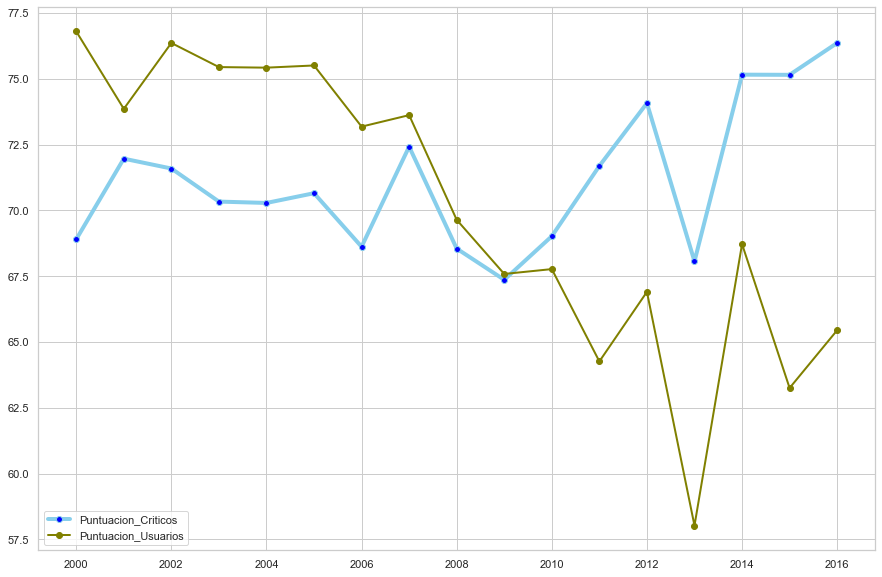

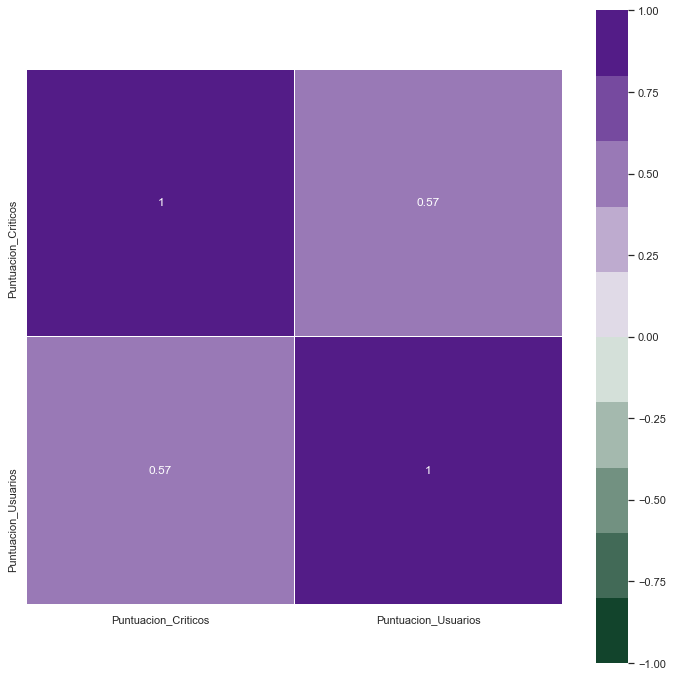

In [42]:
#Correlacion Role-Playing
filtro_Shooter_hist = df[df.Genero == "Shooter"]
filtro_Shooter_corr_hist = filtro_Shooter_hist[["Año_de_Salida","Puntuacion_Criticos","Puntuacion_Usuarios"]]
filtro_Shooter_group = filtro_Shooter_corr_hist.groupby("Año_de_Salida")[[
"Año_de_Salida","Puntuacion_Criticos","Puntuacion_Usuarios"]].mean()

# multiple line plots
plt.figure(figsize=(15,10))
plt.plot(  "Año_de_Salida", 'Puntuacion_Criticos', data=filtro_Shooter_group , marker='o', markerfacecolor='blue', color='skyblue', linewidth=4)
plt.plot(  "Año_de_Salida", 'Puntuacion_Usuarios', data=filtro_Shooter_group , marker='o', color='olive', linewidth=2)

# show legend
plt.legend()

# show graph
 

plt.show()





plt.figure(figsize=(12,12))
sns.heatmap(filtro_Shooter_corr.corr(), 
            vmin = -1, 
            vmax = 1, 
            cmap = sns.diverging_palette(145, 280, s=85, l=25, n=10), 
            annot = True,
           square = True,
           linewidths = .5);

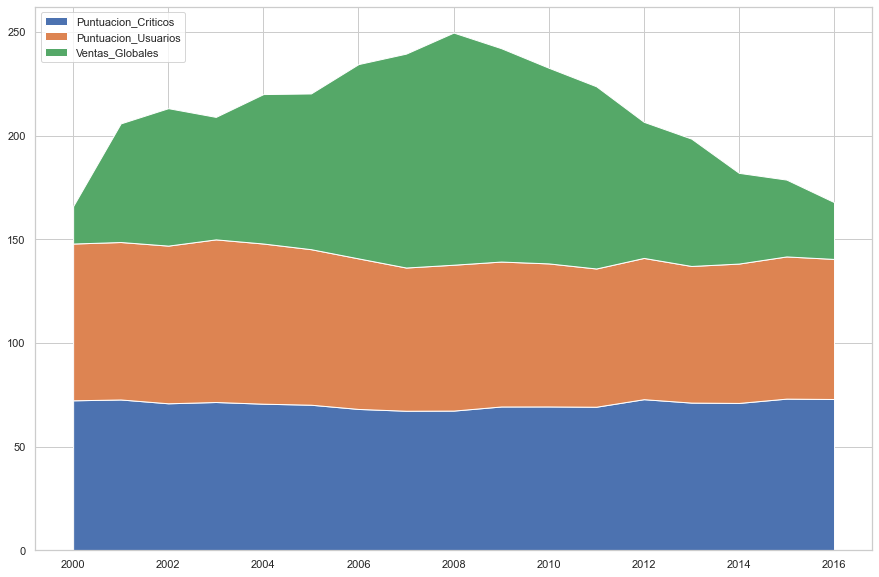

In [48]:
#Agrupacion en tabla de medias de puntuaciones y total de ventas 
filtro_ventas = df[[
"Año_de_Salida","Puntuacion_Criticos","Puntuacion_Usuarios", "Ventas_NA", "Ventas_EUR", "Ventas_JP","Ventas_Globales"]]
filtro_ventas_group1 = filtro_ventas.groupby("Año_de_Salida")[["Año_de_Salida","Puntuacion_Criticos","Puntuacion_Usuarios"]].mean() 
filtro_ventas_group2 = filtro_ventas.groupby("Año_de_Salida")[["Ventas_NA", "Ventas_EUR", "Ventas_JP","Ventas_Globales"]].sum()
filtro_ventras_final2 = pd.concat([filtro_ventas_group1, filtro_ventas_group2], axis=1)

x=filtro_ventras_final2['Año_de_Salida']
y1= filtro_ventras_final2['Puntuacion_Criticos']
y2=filtro_ventras_final2['Puntuacion_Usuarios']
y3=filtro_ventras_final2['Ventas_Globales']/4.5

#Grafico
 
# Basic stacked area chart.
plt.figure(figsize=(15,10))
plt.stackplot(x,y1, y2, y3, labels=['Puntuacion_Criticos','Puntuacion_Usuarios','Ventas_Globales','Ventas_Globales'])
plt.legend(loc='upper left')
plt.show()

In [62]:
#Tablas
agrupacion_genero = df[["Puntuacion_Criticos", "Puntuacion_Usuarios", 'Genero']]
agrupaciongenero = agrupacion_genero.groupby("Genero")[["Genero","Puntuacion_Criticos", "Puntuacion_Usuarios"]].mean()

agrupacion_platform = df[["Puntuacion_Criticos", "Puntuacion_Usuarios", 'Plataforma']]
agrupacionplat= agrupacion_platform.groupby("Plataforma")[["Plataforma","Puntuacion_Criticos", "Puntuacion_Usuarios",]].mean().sort_values(by = "Puntuacion_Criticos", ascending = False)
